In [345]:
import warnings
warnings.filterwarnings('ignore')

In [346]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [347]:
%matplotlib inline

In [348]:
#Importing Data
prev_app = pd.read_csv('previous_application.csv')
curr_app = pd.read_csv('application_data.csv')

# Understanding Data.

In [349]:

prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
curr_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [351]:
prev_app_df = prev_app.copy()
curr_app_df = curr_app.copy()

In [352]:
prev_app.shape


(1670214, 37)

In [353]:
prev_app_df.shape

(1670214, 37)

In [354]:
curr_app_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

#  Data Cleaning

Dropping columns which are deemed irrelevant for analysis.

In [355]:
# Function for determing percentage of null values in columns of dataframe
def Null_perc_features(dataframe):
    df = pd.DataFrame(round(((dataframe.isnull().sum()/len(dataframe))*100).sort_values(ascending=False),2)).reset_index()
    df.columns = ['Features','Null_percent']
    return df
# Function for determing percentage of null values greater than 0 in columns of dataframe
def True_Null_Features(dataframe):
    df = Null_perc_features(dataframe)
    df = df[df['Null_percent']>0]
    return df
    

In [356]:
null_curr=Null_perc_features(curr_app_df)
null_curr

,Features,Null_percent
0,COMMONAREA_MEDI,69.87
1,COMMONAREA_AVG,69.87
2,COMMONAREA_MODE,69.87
3,NONLIVINGAPARTMENTS_MODE,69.43
4,NONLIVINGAPARTMENTS_AVG,69.43
5,NONLIVINGAPARTMENTS_MEDI,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_MODE,68.35
8,LIVINGAPARTMENTS_AVG,68.35
9,LIVINGAPARTMENTS_MEDI,68.35


In [357]:
null_curr = True_Null_Features(curr_app_df)
null_curr

,Features,Null_percent
0,COMMONAREA_MEDI,69.87
1,COMMONAREA_AVG,69.87
2,COMMONAREA_MODE,69.87
3,NONLIVINGAPARTMENTS_MODE,69.43
4,NONLIVINGAPARTMENTS_AVG,69.43
5,NONLIVINGAPARTMENTS_MEDI,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_MODE,68.35
8,LIVINGAPARTMENTS_AVG,68.35
9,LIVINGAPARTMENTS_MEDI,68.35


In [358]:
# Dropping columns with more than X% null percentage.
def drop_columns(dataframe,percent):
    null_dataframe=Null_perc_features(dataframe)
    drop_cols = list(null_dataframe[null_dataframe['Null_percent']>percent]['Features'])
    dataframe =  dataframe.drop(columns=drop_cols,axis=1)
    return dataframe
    

In [359]:
curr_app_df = drop_columns(curr_app_df,percent=50)

In [360]:
null_curr=True_Null_Features(curr_app_df)
null_curr

,Features,Null_percent
0,FLOORSMAX_AVG,49.76
1,FLOORSMAX_MODE,49.76
2,FLOORSMAX_MEDI,49.76
3,YEARS_BEGINEXPLUATATION_AVG,48.78
4,YEARS_BEGINEXPLUATATION_MODE,48.78
5,YEARS_BEGINEXPLUATATION_MEDI,48.78
6,TOTALAREA_MODE,48.27
7,EMERGENCYSTATE_MODE,47.40
8,OCCUPATION_TYPE,31.35
9,EXT_SOURCE_3,19.83


In [361]:
curr_app_df = drop_columns(curr_app_df,percent=47)

In [362]:
null_curr=True_Null_Features(curr_app_df)
null_curr

,Features,Null_percent
0,OCCUPATION_TYPE,31.35
1,EXT_SOURCE_3,19.83
2,AMT_REQ_CREDIT_BUREAU_YEAR,13.50
3,AMT_REQ_CREDIT_BUREAU_QRT,13.50
4,AMT_REQ_CREDIT_BUREAU_MON,13.50
5,AMT_REQ_CREDIT_BUREAU_WEEK,13.50
6,AMT_REQ_CREDIT_BUREAU_DAY,13.50
7,AMT_REQ_CREDIT_BUREAU_HOUR,13.50
8,NAME_TYPE_SUITE,0.42
9,OBS_30_CNT_SOCIAL_CIRCLE,0.33


In [363]:
curr_app_df.shape

(307511, 73)

### Dividing Features into Numeric Variables and Categorical Variables.

In [364]:
curr_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [365]:
numeric_variables = curr_app_df.select_dtypes(include=['float64','int64'])

In [366]:
numeric_variables.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [367]:
numeric_variables.shape

(307511, 61)

In [368]:
num_null = True_Null_Features(numeric_variables)
num_null

,Features,Null_percent
0,EXT_SOURCE_3,19.83
1,AMT_REQ_CREDIT_BUREAU_YEAR,13.50
2,AMT_REQ_CREDIT_BUREAU_QRT,13.50
3,AMT_REQ_CREDIT_BUREAU_MON,13.50
4,AMT_REQ_CREDIT_BUREAU_WEEK,13.50
5,AMT_REQ_CREDIT_BUREAU_DAY,13.50
6,AMT_REQ_CREDIT_BUREAU_HOUR,13.50
7,DEF_60_CNT_SOCIAL_CIRCLE,0.33
8,OBS_60_CNT_SOCIAL_CIRCLE,0.33
9,DEF_30_CNT_SOCIAL_CIRCLE,0.33


In [369]:
numeric_variables.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

Comments

Sk_ID_CURR is required for merging data

TARGET is target variable

CNT_CHILDREN 

AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE Impute,handling outliers and Standardize

DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH convert to positive

'REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' Check correlation

'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'  check correlation

'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' imputation

'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' imputation

'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'

'HOUR_APPR_PROCESS_START'
'DAYS_LAST_PHONE_CHANGE'
'CNT_FAM_MEMBERS'
'EXT_SOURCE_2','EXT_SOURCE_3'


In [370]:
categorical_variables = curr_app_df.select_dtypes(include= 'object')

In [371]:
categorical_variables.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [372]:
cat_null = True_Null_Features(categorical_variables)
cat_null

,Features,Null_percent
0,OCCUPATION_TYPE,31.35
1,NAME_TYPE_SUITE,0.42


In [373]:
categorical_variables.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

'CODE_GENDER' change M-Male and F-Female 

'OCCUPATION_TYPE' change null to 'Unknown' category

'NAME_TYPE_SUITE' Impute with Mode

'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE' 

'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'

# Handling Missing values starting from categorical variables

Feature--OCCUPATION_TYPE 

In [374]:
categorical_variables.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [375]:
categorical_variables.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [376]:
categorical_variables['OCCUPATION_TYPE'].value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [377]:
cat_null

,Features,Null_percent
0,OCCUPATION_TYPE,31.35
1,NAME_TYPE_SUITE,0.42


We can see that Missing data(31.35%) occupies more proportion than Laborers(Mode)(26.13). So, imputing with Mode(Laborers) will introduce bias during our analysis. So, Assigning 'Unknown' category to missing values.

In [378]:
curr_app_df['OCCUPATION_TYPE']=curr_app_df['OCCUPATION_TYPE'].fillna(value='Unknown')


In [379]:
curr_app_df['OCCUPATION_TYPE'].value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Feature--NAME_TYPE_SUITE

In [380]:
categorical_variables['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

Since Missing/Null values percentage(0.42) is quite low. We will not impute this column.

Feature--CODE_GENDER

In [381]:
curr_app_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

‘XNA’ in the above output might be because of the third gender or incorrect information while data entry. So, let's keep it as it is.

In [382]:
## Changing values M to Male and F to Female
curr_app_df['CODE_GENDER'] = ['Male' if gender == 'M' else 'Female' if gender=='F' else 'XNA' for gender in curr_app_df['CODE_GENDER'] ]


In [383]:
curr_app_df['CODE_GENDER'].value_counts()

Female    202448
Male      105059
XNA            4
Name: CODE_GENDER, dtype: int64

In [384]:
curr_app_df['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [385]:
curr_app_df['FLAG_OWN_CAR'].value_counts(normalize=True)*100

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

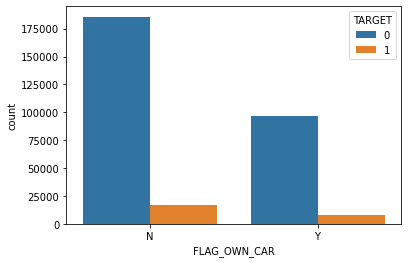

In [386]:
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=curr_app_df)
plt.show()

In [387]:
curr_app_df['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [388]:
curr_app_df['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

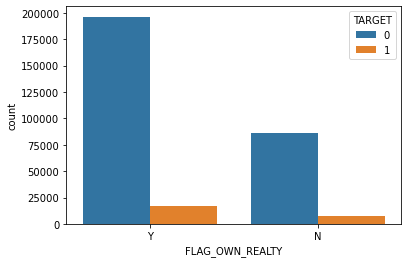

In [389]:
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=curr_app_df)
plt.show()

In [390]:
curr_app_df['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [391]:
curr_app_df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [392]:
curr_app_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [393]:
curr_app_df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [394]:
curr_app_df['WEEKDAY_APPR_PROCESS_START'].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [395]:
curr_app_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

Numerical Variables

In [396]:
numeric_variables.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [397]:
numeric_variables.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [398]:
curr_app_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Creating seperate data frame for Document columns for analysis.

In [399]:
Doc_columns = [d for d in curr_app_df.columns if 'DOCUMENT' in d]
Doc_df = curr_app_df[Doc_columns]
Doc_df.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [400]:
Doc_df.shape

(307511, 20)

In [401]:
Doc_df.mean()*100

FLAG_DOCUMENT_2      0.004227
FLAG_DOCUMENT_3     71.002338
FLAG_DOCUMENT_4      0.008130
FLAG_DOCUMENT_5      1.511491
FLAG_DOCUMENT_6      8.805539
FLAG_DOCUMENT_7      0.019186
FLAG_DOCUMENT_8      8.137595
FLAG_DOCUMENT_9      0.389580
FLAG_DOCUMENT_10     0.002276
FLAG_DOCUMENT_11     0.391206
FLAG_DOCUMENT_12     0.000650
FLAG_DOCUMENT_13     0.352508
FLAG_DOCUMENT_14     0.293648
FLAG_DOCUMENT_15     0.120971
FLAG_DOCUMENT_16     0.992810
FLAG_DOCUMENT_17     0.026666
FLAG_DOCUMENT_18     0.812979
FLAG_DOCUMENT_19     0.059510
FLAG_DOCUMENT_20     0.050730
FLAG_DOCUMENT_21     0.033495
dtype: float64

In [402]:
print(Doc_columns)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


In [403]:
Doc_df.sum().values

array([    13, 218340,     25,   4648,  27078,     59,  25024,   1198,
            7,   1203,      2,   1084,    903,    372,   3053,     82,
         2500,    183,    156,    103], dtype=int64)

In [404]:
Doc_df.sum().index

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [405]:
Doc_df['TARGET'] = curr_app_df['TARGET'].replace({1:'Potential-Defaulter',0:'All Other Cases'})
## Categorizing Target variable. 1 as 'Potential-Defaulter'  and 0 as 'Potential-Borrower'

In [406]:
Doc_df.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Potential-Defaulter
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,All Other Cases
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,All Other Cases
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,All Other Cases
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,All Other Cases


In [407]:
Doc_df.columns[:20]

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [408]:
Doc_df[Doc_df['TARGET']=='Potential-Defaulter'].sum()

FLAG_DOCUMENT_2                                                     4
FLAG_DOCUMENT_3                                                 19312
FLAG_DOCUMENT_4                                                     0
FLAG_DOCUMENT_5                                                   372
FLAG_DOCUMENT_6                                                  1507
FLAG_DOCUMENT_7                                                     3
FLAG_DOCUMENT_8                                                  1836
FLAG_DOCUMENT_9                                                    74
FLAG_DOCUMENT_10                                                    0
FLAG_DOCUMENT_11                                                   75
FLAG_DOCUMENT_12                                                    0
FLAG_DOCUMENT_13                                                   30
FLAG_DOCUMENT_14                                                   30
FLAG_DOCUMENT_15                                                   11
FLAG_DOCUMENT_16    

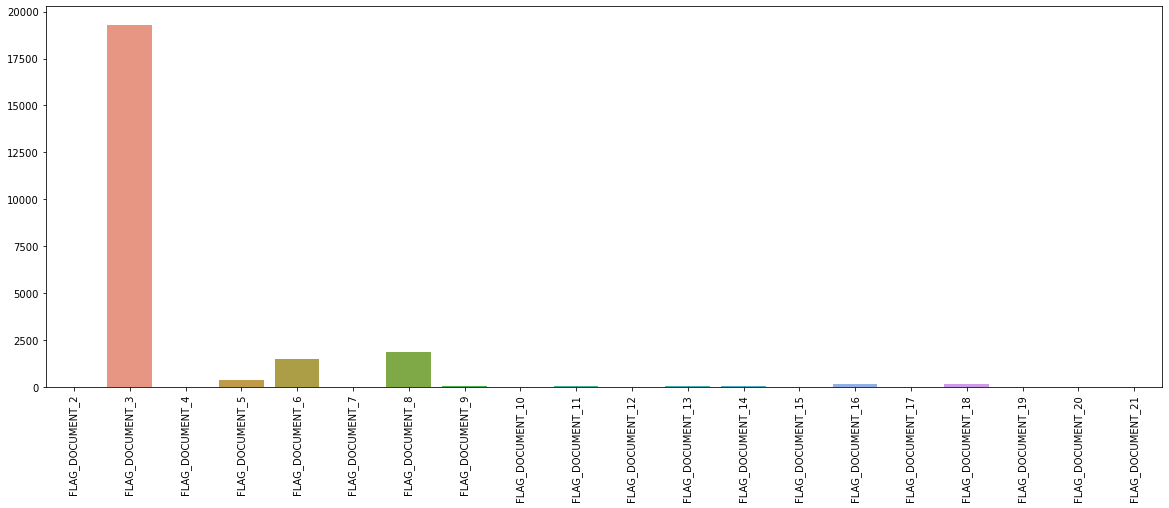

In [319]:
# Countplot of FLAG-DOCUMENTS for Potential defaulter as total number of documents submitted by clients is known through sum().
plt.figure(figsize=(20,7))
sns.barplot(x=Doc_df[Doc_df['TARGET']=='Potential-Defaulter'].sum().index[:20],y=Doc_df[Doc_df['TARGET']=='Potential-Defaulter'].sum().values[:20])
plt.xticks(rotation=90)
plt.show()

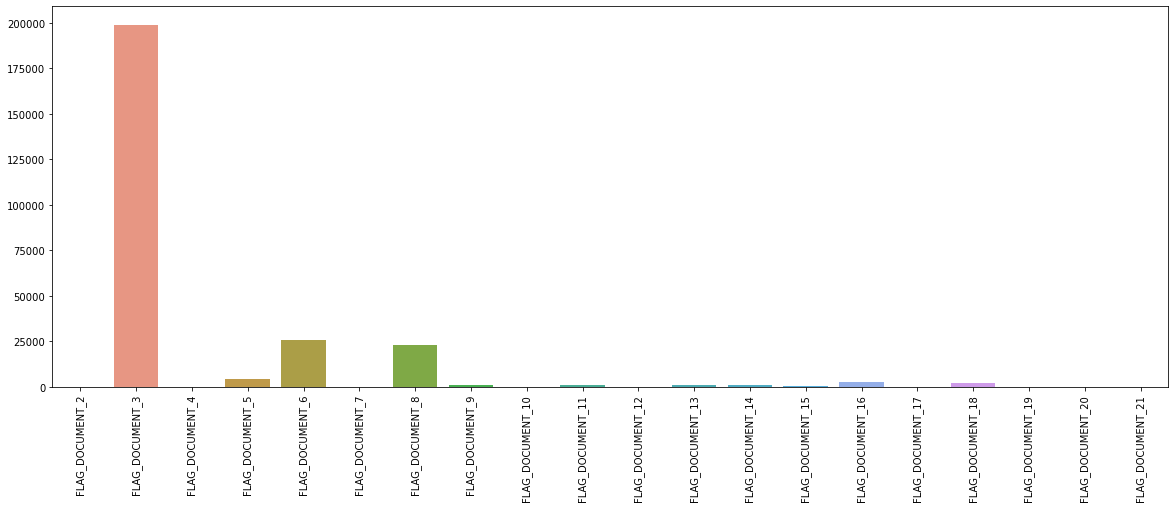

In [320]:
# Countplot of FLAG-DOCUMENTS for All Other Cases as total number of documents submitted by clients is known through sum().
plt.figure(figsize=(20,7))
sns.barplot(x=Doc_df[Doc_df['TARGET']=='All Other Cases'].sum().index[:20],y=Doc_df[Doc_df['TARGET']=='All Other Cases'].sum().values[:20])
plt.xticks(rotation=90)
plt.show()

In [409]:
Doc_df['FLAG_DOCUMENT_3'].value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

We can see that only 'FLAG_DOCUMENT_3' variable is significant indicator for both target variables which everyone is willing to submit. So, removing irrevalent document columns.

In [410]:
Doc_columns.remove('FLAG_DOCUMENT_3')

In [411]:
Doc_columns

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [412]:
# Dropping irrelevant flag Columns.
curr_app_df = curr_app_df.drop(columns=Doc_columns,axis=1)
curr_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Creating separate dataframe for contact information

In [413]:
contact_info_df = curr_app_df[['FLAG_MOBIL', 'FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']]

In [414]:
contact_info_df.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
0,1,1,0,1,1,0
1,1,1,0,1,1,0
2,1,1,1,1,1,0
3,1,1,0,1,0,0
4,1,1,0,1,0,0


In [415]:
contact_info_df.sum()

FLAG_MOBIL          307510
FLAG_EMP_PHONE      252125
FLAG_WORK_PHONE      61308
FLAG_CONT_MOBILE    306937
FLAG_PHONE           86431
FLAG_EMAIL           17442
dtype: int64

In [416]:
contact_info_df.mean()*100

FLAG_MOBIL          99.999675
FLAG_EMP_PHONE      81.988937
FLAG_WORK_PHONE     19.936848
FLAG_CONT_MOBILE    99.813340
FLAG_PHONE          28.106637
FLAG_EMAIL           5.671992
dtype: float64

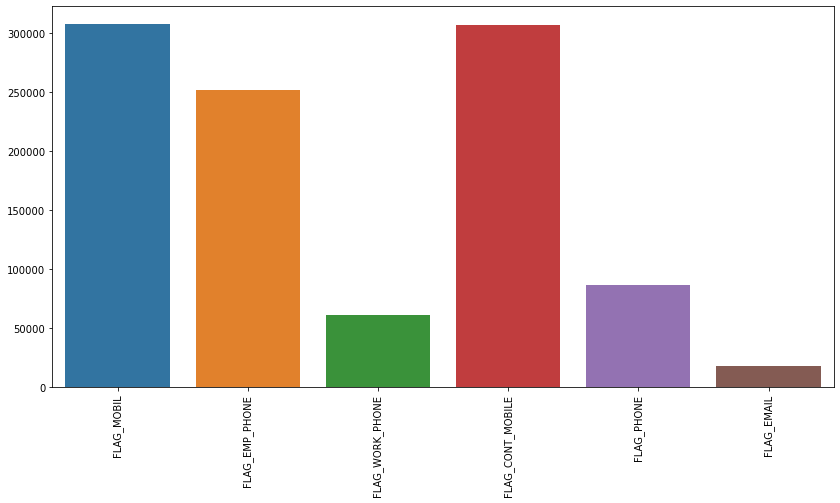

In [330]:
plt.figure(figsize=(14,7))
sns.barplot(x=contact_info_df.sum().index ,y=contact_info_df.sum().values)
plt.xticks(rotation=90)
plt.show()

In [417]:
contact_info_df['TARGET'] = curr_app_df['TARGET'].replace({1:'Potential-Defaulter',0:'All Other Cases'})
## Categorizing Target variable. 1 as 'Potential-Defaulter'  and 0 as 'Potential-Borrower'

In [418]:
contact_info_df[contact_info_df['TARGET']=='Potential-Defaulter'].sum()

FLAG_MOBIL                                                      24825
FLAG_EMP_PHONE                                                  21834
FLAG_WORK_PHONE                                                  5904
FLAG_CONT_MOBILE                                                24780
FLAG_PHONE                                                       6081
FLAG_EMAIL                                                       1374
TARGET              Potential-DefaulterPotential-DefaulterPotentia...
dtype: object

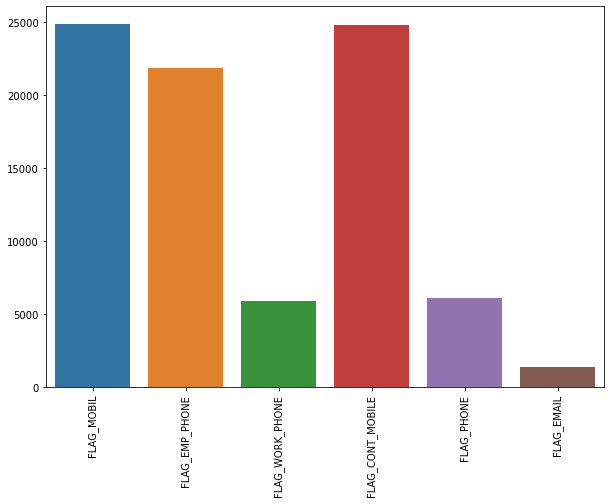

In [75]:
#Countplot of contact_info columns for potential-defaulters
plt.figure(figsize=(10,7))
sns.barplot(x=contact_info_df[contact_info_df['TARGET']=='Potential-Defaulter'].sum().index[:6],y=contact_info_df[contact_info_df['TARGET']=='Potential-Defaulter'].sum().values[:6])
plt.xticks(rotation=90)
plt.show()

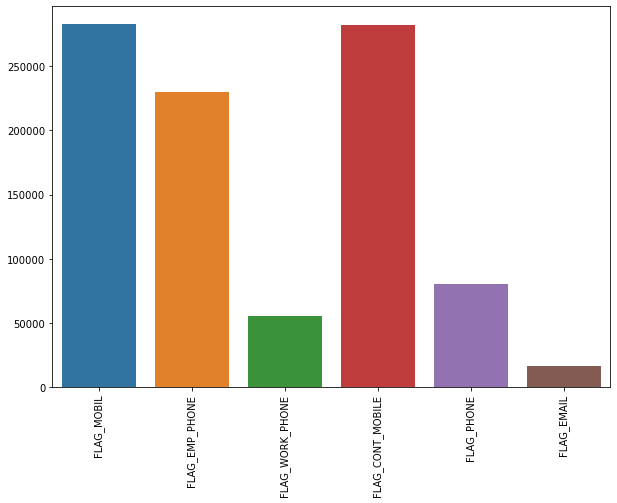

In [334]:
#Countplot of contact_info columns for All Other Cases.
plt.figure(figsize=(10,7))
sns.barplot(x=contact_info_df[contact_info_df['TARGET']=='All Other Cases'].sum().index[:6],y=contact_info_df[contact_info_df['TARGET']=='All Other Cases'].sum().values[:6])
plt.xticks(rotation=90)
plt.show()

We can see that 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE' significant indicators for target variable. Removing unecessary columns

In [419]:
#Dropping 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_CONT_MOBILE' columns.
curr_app_df = curr_app_df.drop(columns=['FLAG_WORK_PHONE','FLAG_PHONE', 'FLAG_EMAIL'])

In [420]:
curr_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
curr_app_df.shape

(307511, 51)

In [422]:
num_null['Features']

0                   EXT_SOURCE_3
1     AMT_REQ_CREDIT_BUREAU_YEAR
2      AMT_REQ_CREDIT_BUREAU_QRT
3      AMT_REQ_CREDIT_BUREAU_MON
4     AMT_REQ_CREDIT_BUREAU_WEEK
5      AMT_REQ_CREDIT_BUREAU_DAY
6     AMT_REQ_CREDIT_BUREAU_HOUR
7       DEF_60_CNT_SOCIAL_CIRCLE
8       OBS_60_CNT_SOCIAL_CIRCLE
9       DEF_30_CNT_SOCIAL_CIRCLE
10      OBS_30_CNT_SOCIAL_CIRCLE
11                  EXT_SOURCE_2
12               AMT_GOODS_PRICE
Name: Features, dtype: object

Creating a dataframe for information regarding Region atrributes.

In [423]:
Region_df = curr_app_df[['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' ]]

In [424]:
Region_df.head()

,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0.018801,2,2,0,0,0,0,0,0
1,0.003541,1,1,0,0,0,0,0,0
2,0.010032,2,2,0,0,0,0,0,0
3,0.008019,2,2,0,0,0,0,0,0
4,0.028663,2,2,0,0,0,0,1,1


In [425]:
Region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   REGION_POPULATION_RELATIVE   307511 non-null  float64
 1   REGION_RATING_CLIENT         307511 non-null  int64  
 2   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 3   REG_REGION_NOT_LIVE_REGION   307511 non-null  int64  
 4   REG_REGION_NOT_WORK_REGION   307511 non-null  int64  
 5   LIVE_REGION_NOT_WORK_REGION  307511 non-null  int64  
 6   REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 7   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 8   LIVE_CITY_NOT_WORK_CITY      307511 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 21.1 MB


In [426]:
Region_df.describe()

,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.020868,2.052463,2.031521,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,0.013831,0.509034,0.502737,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,0.000290,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010006,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.018850,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.028663,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.072508,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see there are no null values for these columns and are required for further analysis.



Creating dataframe with columns containing 'DAYS' keyword.

In [427]:
Days_df = curr_app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE' ]]

In [428]:
Days_df.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0


In [429]:
Days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DAYS_BIRTH              307511 non-null  int64  
 1   DAYS_EMPLOYED           307511 non-null  int64  
 2   DAYS_REGISTRATION       307511 non-null  float64
 3   DAYS_ID_PUBLISH         307511 non-null  int64  
 4   DAYS_LAST_PHONE_CHANGE  307510 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 11.7 MB


In [430]:
Days_df.describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [431]:
## Converting negative values to positive
Days_df = Days_df.apply(lambda x:abs(x),axis=1)


In [432]:
curr_app_df[Days_df.columns].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [433]:
## Converting negative values to positive
curr_app_df[Days_df.columns] = curr_app_df[Days_df.columns].apply(lambda x:abs(x),axis=1)

In [434]:
curr_app_df[Days_df.columns].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


In [435]:
Days_df.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0


Converting DAYS_BIRTH and DAYS_EMPLOYED to years and binning them for better understanding

In [436]:
Days_df['AGE'] = Days_df['DAYS_BIRTH']/365

In [437]:
Days_df['AGE'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [438]:
## Creating another variable called 'AGE-GROUP-DETAILED'
curr_app_df['AGE-GROUP-DETAILED'] = pd.cut(Days_df['AGE'],bins=[20,25,30,35,40,45,50,55,60,100],
                                  labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-Above'])

In [439]:
## Creating another variable called 'AGE-GROUP-DETAILED' for Days_df
Days_df['AGE-GROUP-DETAILED'] = pd.cut(Days_df['AGE'],bins=[20,25,30,35,40,45,50,55,60,100],
                                  labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-Above'])

In [440]:
curr_app_df['AGE-GROUP-DETAILED'].value_counts(normalize=True)*100

35-40       13.940314
40-45       13.464884
30-35       12.825557
60-Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
Name: AGE-GROUP-DETAILED, dtype: float64

In [441]:
Days_df.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AGE,AGE-GROUP-DETAILED
0,9461.0,637.0,3648.0,2120.0,1134.0,25.920548,25-30
1,16765.0,1188.0,1186.0,291.0,828.0,45.931507,45-50
2,19046.0,225.0,4260.0,2531.0,815.0,52.180822,50-55
3,19005.0,3039.0,9833.0,2437.0,617.0,52.068493,50-55
4,19932.0,3038.0,4311.0,3458.0,1106.0,54.608219,50-55


In [442]:
# Creating new column 'YEARS_EMPLOYED'.
Days_df['YEARS_EMPLOYED'] = Days_df['DAYS_EMPLOYED']/365

In [443]:
Days_df['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [444]:
Days_df['YEARS_EMPLOYED'].isnull().sum()

0

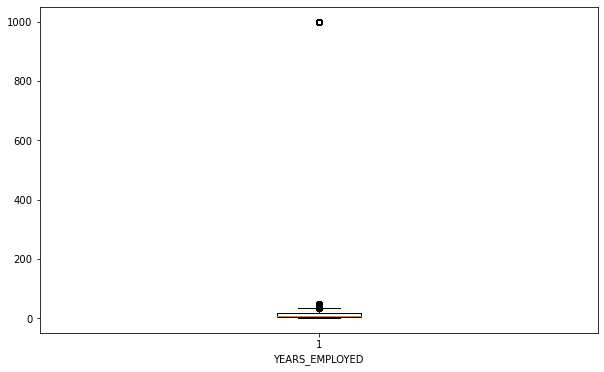

In [445]:
#'YEARS_EMPLOYED' Box-Plot for Outlier Analysis
plt.figure(figsize=(10,6))
plt.boxplot(Days_df['YEARS_EMPLOYED'])
plt.xlabel('YEARS_EMPLOYED')
plt.show()

There is one outlier where No of Years employed is 1000 years which is impossible 

In [446]:
#Creating another dataframe Outliers_empYrs_df for further analysis.
Outlier_empYrs_df = Days_df[Days_df['YEARS_EMPLOYED'] == Days_df['YEARS_EMPLOYED'].max()]

In [447]:
Outlier_empYrs_df.shape

(55374, 8)

In [448]:
Outlier_empYrs_df['AGE'].describe()

count    55374.000000
mean        59.753450
std          5.501600
min         21.071233
25%         57.093151
50%         60.413699
75%         63.487671
max         69.120548
Name: AGE, dtype: float64

In [449]:
Outlier_empYrs_df['AGE-GROUP-DETAILED'].value_counts()

60-Above    29578
55-60       19024
50-55        4311
45-50        1185
40-45         638
35-40         343
30-35         159
25-30         102
20-25          34
Name: AGE-GROUP-DETAILED, dtype: int64

In [450]:
#Creating Dataframe where number of years employed <50.
empYrs_df = Days_df[Days_df['YEARS_EMPLOYED'] < 50]

In [451]:
empYrs_df['YEARS_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

In [452]:
# Quality Check considering minimum age where a client employed at 17

empYrs_df[empYrs_df['YEARS_EMPLOYED'] > (empYrs_df['AGE']-17)]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AGE,AGE-GROUP-DETAILED,YEARS_EMPLOYED


In [453]:
pd.DataFrame(empYrs_df.groupby(by=['AGE-GROUP-DETAILED'])['YEARS_EMPLOYED'].describe())

,count,mean,std,min,25%,50%,75%,max
AGE-GROUP-DETAILED,,,,,,,,
20-25,12125.0,2.142574,1.369052,0.010959,1.013699,1.936986,3.035616,6.939726
25-30,32760.0,3.551041,2.471527,0.019178,1.520548,3.046575,5.098630,11.972603
30-35,39281.0,4.883293,3.587961,0.000000,1.961644,4.030137,7.246575,16.756164
35-40,42525.0,6.104724,4.863612,0.010959,2.208219,4.747945,8.824658,21.849315
40-45,40768.0,7.161680,6.064651,0.000000,2.463014,5.372603,10.065753,26.936986
45-50,33950.0,7.951818,7.037407,0.005479,2.619178,5.783562,11.117808,31.926027
50-55,30631.0,9.066370,8.347458,0.005479,2.893151,6.410959,12.427397,36.997260
55-60,14096.0,10.194784,9.602088,0.008219,3.079452,7.079452,13.869178,41.671233
60-Above,6001.0,11.642625,11.052307,0.002740,3.558904,7.909589,15.756164,49.073973


In [454]:
med_replace=pd.DataFrame(empYrs_df.groupby(by=['AGE-GROUP-DETAILED'])['YEARS_EMPLOYED'].median())

In [455]:
med_replace

,YEARS_EMPLOYED
AGE-GROUP-DETAILED,
20-25,1.936986
25-30,3.046575
30-35,4.030137
35-40,4.747945
40-45,5.372603
45-50,5.783562
50-55,6.410959
55-60,7.079452
60-Above,7.909589


In [456]:
med_replace._get_value('20-25','YEARS_EMPLOYED')

1.936986301369863

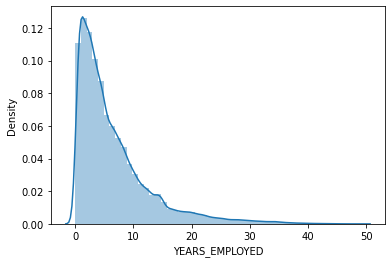

In [457]:
sns.distplot(empYrs_df['YEARS_EMPLOYED'])
plt.show()

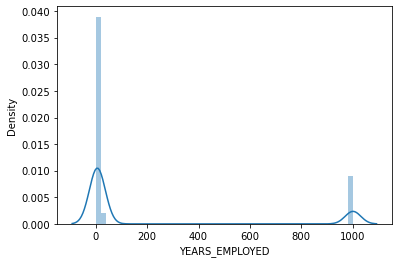

In [458]:
sns.distplot(Days_df['YEARS_EMPLOYED'])
plt.show()

We can clearly observe the outliers in plot. So, impute with median.

In [459]:
Outlier_empYrs_df['YEARS_EMPLOYED'].value_counts()

1000.665753    55374
Name: YEARS_EMPLOYED, dtype: int64

In [460]:
Outlier_empYrs_df['YEARS_EMPLOYED'].mode()[0]

1000.6657534246575

In [461]:
Days_df.groupby(by=['AGE-GROUP-DETAILED'])['YEARS_EMPLOYED'].describe()

,count,mean,std,min,25%,50%,75%,max
AGE-GROUP-DETAILED,,,,,,,,
20-25,12159.0,4.934727,52.747807,0.010959,1.019178,1.942466,3.045205,1000.665753
25-30,32862.0,6.645974,55.521240,0.019178,1.523288,3.057534,5.117808,1000.665753
30-35,39440.0,8.897730,63.200579,0.000000,1.967123,4.052055,7.295890,1000.665753
35-40,42868.0,14.062512,88.740225,0.010959,2.224658,4.800000,8.958904,1000.665753
40-45,41406.0,22.469984,122.519763,0.000000,2.504110,5.495890,10.405479,1000.665753
45-50,35135.0,41.433134,179.346421,0.005479,2.715068,6.076712,12.052055,1000.665753
50-55,34942.0,131.405817,326.203780,0.005479,3.306849,7.720548,17.866438,1000.665753
55-60,33120.0,579.117481,489.770212,0.008219,8.800000,1000.665753,1000.665753,1000.665753
60-Above,35579.0,833.850278,370.380097,0.002740,1000.665753,1000.665753,1000.665753,1000.665753


Every age-group has max value of 1000+ years employed. So, we impute corresponding median value of that group and impute.

In [462]:
Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='20-25')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='20-25')].replace(1000.6657534246575,med_replace._get_value('20-25','YEARS_EMPLOYED'))



In [463]:
Days_df.groupby(by=['AGE-GROUP-DETAILED'])['YEARS_EMPLOYED'].describe()

,count,mean,std,min,25%,50%,75%,max
AGE-GROUP-DETAILED,,,,,,,,
20-25,12159.0,2.141999,1.367180,0.010959,1.019178,1.936986,3.032877,6.939726
25-30,32862.0,6.645974,55.521240,0.019178,1.523288,3.057534,5.117808,1000.665753
30-35,39440.0,8.897730,63.200579,0.000000,1.967123,4.052055,7.295890,1000.665753
35-40,42868.0,14.062512,88.740225,0.010959,2.224658,4.800000,8.958904,1000.665753
40-45,41406.0,22.469984,122.519763,0.000000,2.504110,5.495890,10.405479,1000.665753
45-50,35135.0,41.433134,179.346421,0.005479,2.715068,6.076712,12.052055,1000.665753
50-55,34942.0,131.405817,326.203780,0.005479,3.306849,7.720548,17.866438,1000.665753
55-60,33120.0,579.117481,489.770212,0.008219,8.800000,1000.665753,1000.665753,1000.665753
60-Above,35579.0,833.850278,370.380097,0.002740,1000.665753,1000.665753,1000.665753,1000.665753


In [464]:
Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='25-30')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='25-30')].replace(1000.6657534246575,med_replace._get_value('25-30','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='30-35')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='30-35')].replace(1000.6657534246575,med_replace._get_value('30-35','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='35-40')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='35-40')].replace(1000.6657534246575,med_replace._get_value('35-40','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='40-45')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='40-45')].replace(1000.6657534246575,med_replace._get_value('40-45','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='45-50')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='45-50')].replace(1000.6657534246575,med_replace._get_value('45-50','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='50-55')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='50-55')].replace(1000.6657534246575,med_replace._get_value('50-55','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='55-60')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='55-60')].replace(1000.6657534246575,med_replace._get_value('55-60','YEARS_EMPLOYED'))

Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='60-Above')] = Days_df['YEARS_EMPLOYED'][(Days_df['YEARS_EMPLOYED']>50) & (Days_df['AGE-GROUP-DETAILED'] =='60-Above')].replace(1000.6657534246575,med_replace._get_value('60-Above','YEARS_EMPLOYED'))

In [465]:
Days_df.groupby(by=['AGE-GROUP-DETAILED'])['YEARS_EMPLOYED'].describe()

,count,mean,std,min,25%,50%,75%,max
AGE-GROUP-DETAILED,,,,,,,,
20-25,12159.0,2.141999,1.367180,0.010959,1.019178,1.936986,3.032877,6.939726
25-30,32862.0,3.549475,2.467848,0.019178,1.523288,3.046575,5.087671,11.972603
30-35,39440.0,4.879854,3.581129,0.000000,1.967123,4.030137,7.230137,16.756164
35-40,42868.0,6.093868,4.845622,0.010959,2.224658,4.747945,8.775342,21.849315
40-45,41406.0,7.134114,6.021779,0.000000,2.504110,5.372603,9.969863,26.936986
45-50,35135.0,7.878689,6.928776,0.005479,2.715068,5.783562,10.852055,31.926027
50-55,34942.0,8.738757,7.864198,0.005479,3.306849,6.410959,11.196575,36.997260
55-60,33120.0,8.405349,6.450720,0.008219,7.079452,7.079452,7.079452,41.671233
60-Above,35579.0,8.539229,4.749155,0.002740,7.909589,7.909589,7.909589,49.073973


In [466]:
Days_df['YEARS_EMPLOYED'].isnull().sum()

0

In [467]:
Days_df['YEARS_EMPLOYED-GROUP'] = pd.cut(Days_df['YEARS_EMPLOYED'],bins=[0,5,10,15,20,25,30,50],
                                  labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-Above'])

In [468]:
Days_df['YEARS_EMPLOYED-GROUP'].isnull().sum()

2

In [469]:
Days_df[Days_df['YEARS_EMPLOYED-GROUP'].isnull()==True]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AGE,AGE-GROUP-DETAILED,YEARS_EMPLOYED,YEARS_EMPLOYED-GROUP
23691,12609.0,0.0,2116.0,4452.0,0.0,34.545205,30-35,0.0,NaN
121625,15053.0,0.0,4598.0,4385.0,614.0,41.241096,40-45,0.0,NaN


Null Values are generated because while binning YEARS_EMPLOYED it is considering '0.0' values

In [470]:
Days_df['YEARS_EMPLOYED-GROUP'].fillna('0-5',inplace=True)

In [471]:
Days_df['YEARS_EMPLOYED-GROUP'].isnull().sum()

0

In [472]:
Days_df.head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,AGE,AGE-GROUP-DETAILED,YEARS_EMPLOYED,YEARS_EMPLOYED-GROUP
0,9461.0,637.0,3648.0,2120.0,1134.0,25.920548,25-30,1.745205,0-5
1,16765.0,1188.0,1186.0,291.0,828.0,45.931507,45-50,3.254795,0-5
2,19046.0,225.0,4260.0,2531.0,815.0,52.180822,50-55,0.616438,0-5
3,19005.0,3039.0,9833.0,2437.0,617.0,52.068493,50-55,8.326027,5-10
4,19932.0,3038.0,4311.0,3458.0,1106.0,54.608219,50-55,8.323288,5-10


In [473]:
curr_app_df['YEARS-EMPLOYED'] = Days_df['YEARS_EMPLOYED-GROUP']

In [474]:
Days_df['YEARS_EMPLOYED-GROUP'].value_counts()

0-5         136949
5-10        119608
10-15        27549
15-20        10849
20-25         6243
25-30         3308
30-Above      3005
Name: YEARS_EMPLOYED-GROUP, dtype: int64

In [475]:
curr_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE-GROUP-DETAILED,YEARS-EMPLOYED
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25-30,0-5
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45-50,0-5
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-55,0-5
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN,50-55,5-10
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-55,5-10


In [476]:
True_Null_Features(curr_app_df)

,Features,Null_percent
0,EXT_SOURCE_3,19.83
1,AMT_REQ_CREDIT_BUREAU_YEAR,13.50
2,AMT_REQ_CREDIT_BUREAU_QRT,13.50
3,AMT_REQ_CREDIT_BUREAU_MON,13.50
4,AMT_REQ_CREDIT_BUREAU_WEEK,13.50
5,AMT_REQ_CREDIT_BUREAU_DAY,13.50
6,AMT_REQ_CREDIT_BUREAU_HOUR,13.50
7,NAME_TYPE_SUITE,0.42
8,DEF_60_CNT_SOCIAL_CIRCLE,0.33
9,OBS_60_CNT_SOCIAL_CIRCLE,0.33


Creating a dataframe for credit enquiry data

In [477]:
credit_enquiry_df = curr_app_df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 
                                 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

In [478]:
credit_enquiry_df.head()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0


In [479]:
null_cre_enq = True_Null_Features(credit_enquiry_df)
null_cre_enq

,Features,Null_percent
0,AMT_REQ_CREDIT_BUREAU_HOUR,13.5
1,AMT_REQ_CREDIT_BUREAU_DAY,13.5
2,AMT_REQ_CREDIT_BUREAU_WEEK,13.5
3,AMT_REQ_CREDIT_BUREAU_MON,13.5
4,AMT_REQ_CREDIT_BUREAU_QRT,13.5
5,AMT_REQ_CREDIT_BUREAU_YEAR,13.5


In [480]:
credit_enquiry_df.describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Since above columns are number of enquires made and we can see a large number of entries are '0' means no enquiry against taht particular customer. So we can impute Null values with median('0') since we don't know the number of enquiries made.

In [481]:
curr_app_df.fillna(curr_app_df[credit_enquiry_df.columns].median(),inplace=True)

In [482]:
True_Null_Features(curr_app_df)

,Features,Null_percent
0,EXT_SOURCE_3,19.83
1,NAME_TYPE_SUITE,0.42
2,DEF_60_CNT_SOCIAL_CIRCLE,0.33
3,OBS_30_CNT_SOCIAL_CIRCLE,0.33
4,OBS_60_CNT_SOCIAL_CIRCLE,0.33
5,DEF_30_CNT_SOCIAL_CIRCLE,0.33
6,EXT_SOURCE_2,0.21
7,AMT_GOODS_PRICE,0.09


In [483]:
curr_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [484]:
curr_app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE-GROUP-DETAILED,YEARS-EMPLOYED
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25-30,0-5
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45-50,0-5
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-55,0-5
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,3039.0,9833.0,2437.0,1,1,1,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0,50-55,5-10
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,3038.0,4311.0,3458.0,1,1,1,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-55,5-10


Creating a dataframe for Social-circle data

In [485]:
Social_circle_df = curr_app_df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' ]]

In [486]:
Social_circle_df.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,2.0,2.0,2.0,2.0
1,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0


In [487]:
True_Null_Features(Social_circle_df) 

,Features,Null_percent
0,OBS_30_CNT_SOCIAL_CIRCLE,0.33
1,DEF_30_CNT_SOCIAL_CIRCLE,0.33
2,OBS_60_CNT_SOCIAL_CIRCLE,0.33
3,DEF_60_CNT_SOCIAL_CIRCLE,0.33


In [488]:
Social_circle_df.describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [489]:
Social_circle_df.isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [490]:
credit_info_df = curr_app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' ]]

In [491]:
credit_info_df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,202500.0,406597.5,24700.5,351000.0
1,270000.0,1293502.5,35698.5,1129500.0
2,67500.0,135000.0,6750.0,135000.0
3,135000.0,312682.5,29686.5,297000.0
4,121500.0,513000.0,21865.5,513000.0


In [492]:
credit_info_df.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


In [493]:
True_Null_Features(credit_info_df)

,Features,Null_percent
0,AMT_GOODS_PRICE,0.09


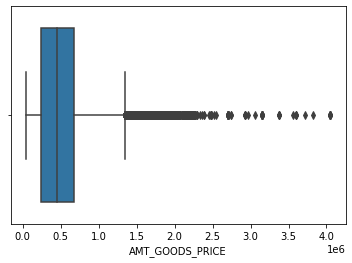

In [494]:
sns.boxplot(credit_info_df['AMT_GOODS_PRICE'])
plt.show()

Since there are outliers in AMT_GOODS_PRICE	data we impute missing values with median.

In [495]:
curr_app_df['AMT_GOODS_PRICE'].median()

450000.0

In [496]:
curr_app_df['AMT_GOODS_PRICE'].fillna(curr_app_df['AMT_GOODS_PRICE'].median(),inplace=True)

In [497]:
curr_app_df['AMT_GOODS_PRICE'].isnull().sum()

0

In [498]:
# Creating bins for Credit Amount,Goods_price,Income

In [499]:
curr_app_df['AMT_INCOME_TOTAL'] = curr_app_df['AMT_INCOME_TOTAL']/100000

curr_app_df['AMT_CREDIT'] = curr_app_df['AMT_CREDIT']/100000

curr_app_df['AMT_GOODS_PRICE'] = curr_app_df['AMT_GOODS_PRICE']/100000

In [500]:
curr_app_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(curr_app_df['AMT_INCOME_TOTAL'],bins=[0,2,4,6,8,10,100],labels=['0-2L','2L-4L','4L-6L','6L-8L','8L-10L','10L-Above'])

curr_app_df['AMT_CREDIT_RANGE'] = pd.cut(curr_app_df['AMT_CREDIT'],bins=[0,2,4,6,8,10,100],labels=['0-2L','2L-4L','4L-6L','6L-8L','8L-10L','10L-Above'])

curr_app_df['AMT_GOODS_PRICE_RANGE'] = pd.cut(curr_app_df['AMT_GOODS_PRICE'],bins=[0,2,4,6,8,10,100],labels=['0-2L','2L-4L','4L-6L','6L-8L','8L-10L','10L-Above'])

In [501]:
curr_app_df['AMT_INCOME_TOTAL_RANGE'].value_counts(normalize=True)*100

0-2L         71.411475
2L-4L        25.967455
4L-6L         2.099458
6L-8L         0.335276
8L-10L        0.106014
10L-Above     0.080323
Name: AMT_INCOME_TOTAL_RANGE, dtype: float64

In [502]:
curr_app_df[curr_app_df['AMT_INCOME_TOTAL_RANGE'].isnull()==True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE-GROUP-DETAILED,YEARS-EMPLOYED,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE
12840,114967,1,Cash loans,Female,N,Y,1,1170.0000,5.624910,26194.5,4.545,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615.0,922.0,6762.0,3643.0,1,1,1,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,30-35,0-5,NaN,4L-6L,4L-6L
203693,336147,0,Cash loans,Male,Y,Y,2,180.0009,6.750000,69295.5,6.750,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.030755,15704.0,4961.0,3338.0,4728.0,1,1,1,Unknown,4.0,2,2,THURSDAY,22,0,0,0,0,0,0,Business Entity Type 3,0.788606,NaN,1.0,0.0,1.0,0.0,1133.0,1,0.0,0.0,0.0,0.0,0.0,1.0,40-45,10-15,NaN,6L-8L,6L-8L
246858,385674,0,Cash loans,Male,Y,Y,0,135.0000,14.005035,130945.5,13.680,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,13551.0,280.0,3953.0,4972.0,1,1,1,Unknown,2.0,2,2,SUNDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.713507,NaN,0.0,0.0,0.0,0.0,13.0,0,0.0,0.0,0.0,0.0,0.0,1.0,35-40,0-5,NaN,10L-Above,10L-Above


Null Values are generated because while binning AMT_INCOME_TOTAL_RANGE it is considering '0.0' values

In [503]:
curr_app_df['AMT_INCOME_TOTAL_RANGE'].fillna('0-2L',inplace=True)

In [504]:
curr_app_df['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

2L-4L        26.389625
4L-6L        21.550449
10L-Above    16.254703
6L-8L        14.061936
0-2L         11.753726
8L-10L        9.989561
Name: AMT_CREDIT_RANGE, dtype: float64

In [505]:
curr_app_df[curr_app_df['AMT_CREDIT_RANGE'].isnull()==True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE-GROUP-DETAILED,YEARS-EMPLOYED,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE


In [506]:
curr_app_df['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

2L-4L        27.309592
4L-6L        22.883084
6L-8L        15.652773
0-2L         13.549109
10L-Above    11.095213
8L-10L        9.510229
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [507]:
curr_app_df[curr_app_df['AMT_GOODS_PRICE_RANGE'].isnull()==True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE-GROUP-DETAILED,YEARS-EMPLOYED,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE


In [508]:
curr_app_df[['CNT_FAM_MEMBERS','CNT_CHILDREN','HOUR_APPR_PROCESS_START',]].isnull().sum()

CNT_FAM_MEMBERS            2
CNT_CHILDREN               0
HOUR_APPR_PROCESS_START    0
dtype: int64

In [509]:
curr_app_df['CNT_FAM_MEMBERS'].fillna(round(curr_app_df['CNT_FAM_MEMBERS'].median(),2),inplace=True)

In [510]:
Other_numvar = curr_app_df[['CNT_FAM_MEMBERS','CNT_CHILDREN','HOUR_APPR_PROCESS_START',]]

In [511]:
Other_numvar.describe()

,CNT_FAM_MEMBERS,CNT_CHILDREN,HOUR_APPR_PROCESS_START
count,307511.000000,307511.000000,307511.000000
mean,2.152664,0.417052,12.063419
std,0.910679,0.722121,3.265832
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,10.000000
50%,2.000000,0.000000,12.000000
75%,3.000000,1.000000,14.000000
max,20.000000,19.000000,23.000000


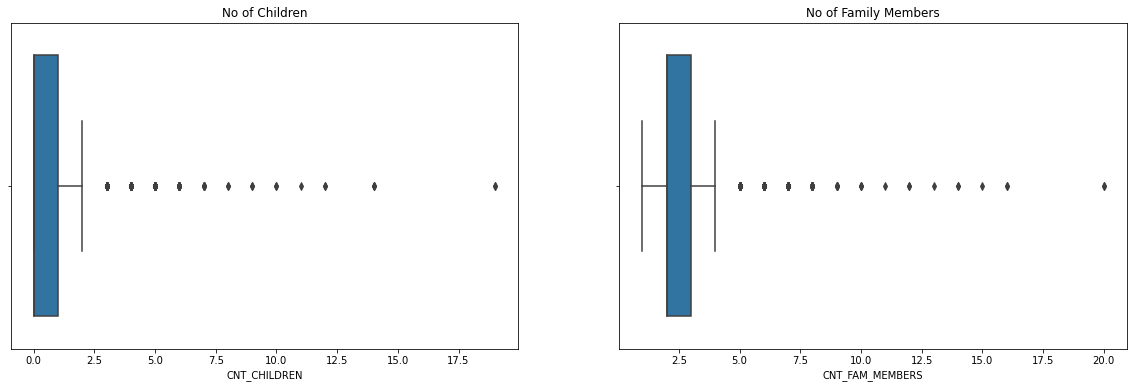

In [512]:
## Checking Outliers.
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('No of Children')
sns.boxplot(Other_numvar['CNT_CHILDREN'])
plt.subplot(1,2,2)
plt.title('No of Family Members')
sns.boxplot(Other_numvar['CNT_FAM_MEMBERS'])
plt.show()

There some number of outliers in both 'CNT_FAM_MEMBERS' and 'CNT_CHILDREN'. Though seem inexplicable there is a possibility of 
occuring such values and these values are not too extreme to not be considered. So, no imputation.

In [513]:
# for Null values in CNT

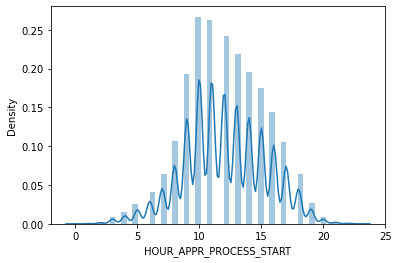

In [514]:
sns.distplot(Other_numvar['HOUR_APPR_PROCESS_START'])
plt.show()

We can between 10.AM to 3.PM lot of clients apply for the loan in this time slot.

Checking 'EXT_SOURCE_2','EXT_SOURCE_3' correlation with Target Variable.

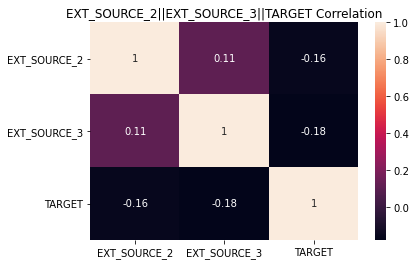

In [515]:
sns.heatmap(curr_app_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(), annot=True)
plt.title('EXT_SOURCE_2||EXT_SOURCE_3||TARGET Correlation')
plt.show()

Correlation of EXT_SOURCE_2,EXT_SOURCE_3 with Target variable and also because of column description we decided to remove these
columns. Also correlation doesn't cause causation.

In [516]:
curr_app_df.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)

In [517]:
curr_app_df.shape

(307511, 54)

In [518]:
curr_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [519]:
curr_app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    

In [520]:
cat_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','FLAG_OWN_CAR','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']
for col in cat_cols:
    curr_app_df[col] = pd.Categorical(curr_app_df[col]) 

In [521]:
curr_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  category
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

Univariate Analysis W.R.T Target Variable.

Checking for data imbalance in Target

In [522]:
curr_app_df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

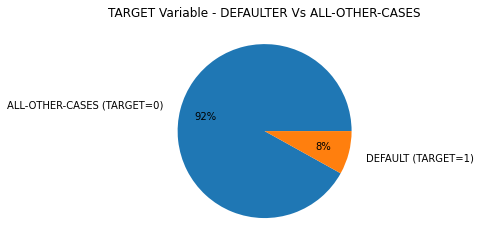

In [523]:
plt.pie(curr_app_df['TARGET'].value_counts(normalize=True)*100,labels=['ALL-OTHER-CASES (TARGET=0)','DEFAULT (TARGET=1)'],autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.2)
plt.title('TARGET Variable - DEFAULTER Vs ALL-OTHER-CASES')
plt.show()


Its clear that there is an imbalance between people who defaulted and who didn't default. More than 92% of people didn't default as opposed to 8% who defaulted.

In [524]:
#Segmenting Dataframe according to Target Variable


In [525]:
# All-Other-Cases dataframe
Other_Cases_df = curr_app_df[curr_app_df['TARGET']==0]

# Defaulters dataframe
Defaulter_df = curr_app_df[curr_app_df['TARGET']==1]

In [526]:
Defaulter_df['CNT_FAM_MEMBERS'].unique()

[1.0, 2.0, 5.0, 3.0, 4.0, ..., 7.0, 10.0, 13.0, 8.0, 11.0]
Length: 11
Categories (11, float64): [1.0, 2.0, 5.0, 3.0, ..., 10.0, 13.0, 8.0, 11.0]

In [527]:
Other_Cases_df['CNT_FAM_MEMBERS'].value_counts().index

CategoricalIndex([ 2.0,  1.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
                  12.0, 14.0, 16.0, 20.0, 15.0, 11.0, 13.0],
                 categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...], ordered=False, dtype='category')

In [528]:
def Uni_curr_target(col):
    i=curr_app_df[col].nunique()
    
    Default_percent = curr_app_df[[col,'TARGET']].groupby(col,as_index=False).mean()
    Default_percent['TARGET'] = Default_percent['TARGET']*100
    Default_percent.sort_values('TARGET',inplace=True)
    
    if i<12:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
    
    # 1. Subplot 1: Count plot of the column
        
    s = sns.countplot(ax=ax1, x=col, data=curr_app_df, hue='TARGET')
    ax1.set_title(col, fontsize = 20)
    ax1.set_yscale('log')
    ax1.legend(['All-Other-Cases','Defaulter'])
    ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
    if i>4:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)    
       
    # 2. Subplot 2: Percentage of defaulters within the column
        
    s = sns.barplot(ax=ax2, x = col, y='TARGET', data=Default_percent)
    ax2.set_title("Defaulters % in "+col, fontsize = 20)    
    ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
    ax2.set_ylabel('TARGET',fontdict={'fontsize' : 15, 'fontweight' : 3})
    
    if i>4:
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
    
    

In [529]:
def Bi_cat_num_curr(col1,col2):
    plt.figure(figsize=(18,8))
    sns.barplot(x=col1,y=col2,data=curr_app_df, hue='TARGET')     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(col1,fontsize = 15)    
    plt.ylabel(col2,fontsize = 15)    
    plt.title(f'{col1} vs {col2}',fontsize = 20) 
    plt.xticks(rotation=90)
    plt.show()
    
def Bi_num_curr(col1,col2):
    
    plt.figure(figsize=(18,8))
    sns.scatterplot(x=col1, y=col2,data=curr_app_df,hue='TARGET')
    plt.xlabel(col1)    
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}',fontsize=15)
    
            
    plt.show()

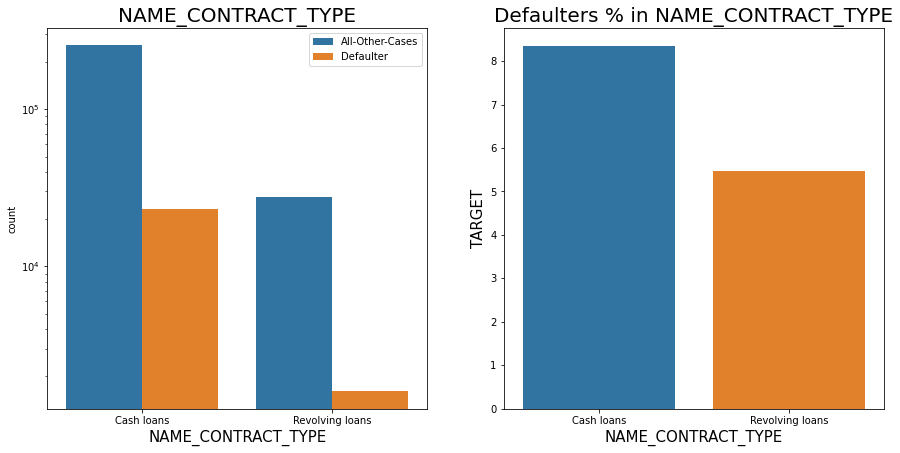

In [530]:
Uni_curr_target('NAME_CONTRACT_TYPE')

Comments:
    
1--Revolving loans are just a small fraction from the total number of loans

2--Around 94% Cash loan applicants and 6% Revolving loan applicant are in defaulters

In [531]:
categorical_variables = curr_app_df.select_dtypes(include= 'object')
categorical_variables.columns

Index([], dtype='object')

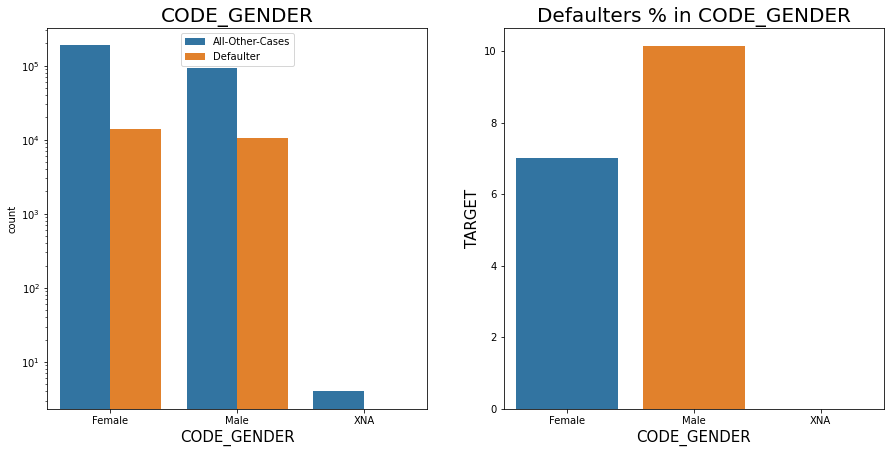

In [532]:
Uni_curr_target('CODE_GENDER')

Comments:

1--The number of female clients is almost double the number of male clients.

2--Based on the percentage of defaulted applicants, males have a higher chance of not returning their loans,comparing with women.

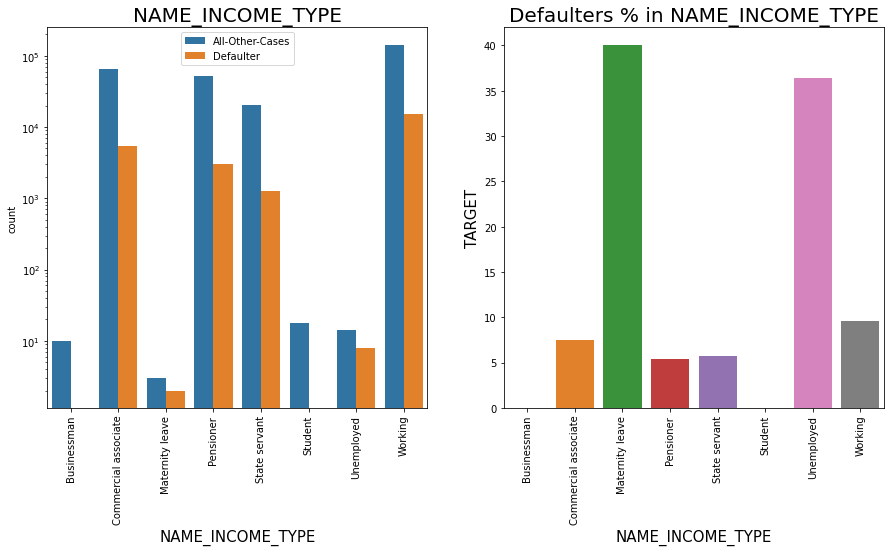

In [533]:
Uni_curr_target('NAME_INCOME_TYPE')

Comments:
    
1--Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.

2--We can also see that the BusinessMen never default.

3--Most of the loans are distributed to working class people

4--We also see that working class people contribute 51% to non defaulters while they contribute to 61% of the defaulters. Clearly, the chances of defaulting are more in their case.

5--Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.

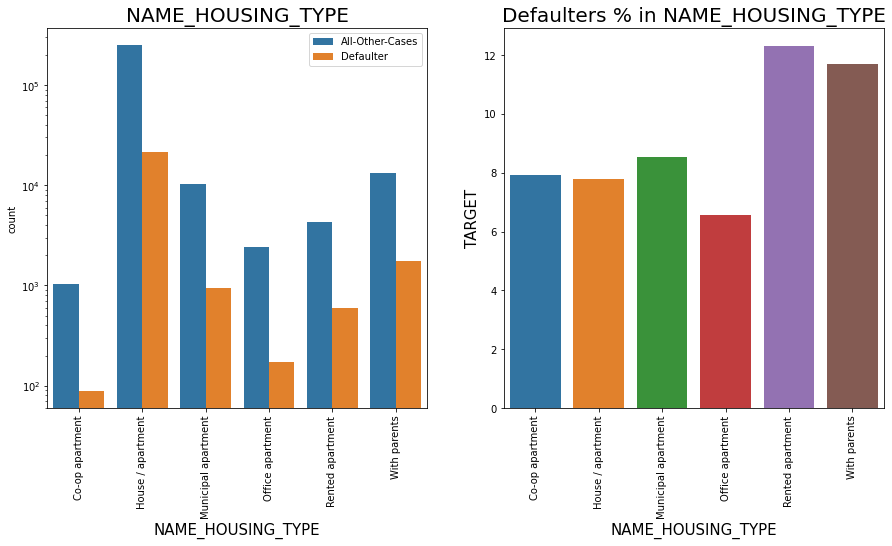

In [534]:
Uni_curr_target('NAME_HOUSING_TYPE')

Comment:
1--Majority of people live in House/apartment.

2--People living in rented apartment and people who live with parents tend to default more often when compared with others.

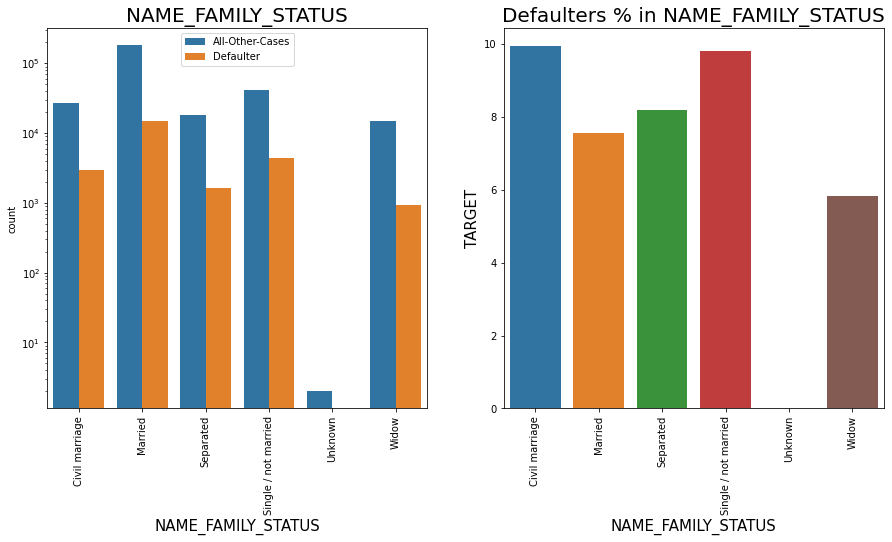

In [535]:
Uni_curr_target('NAME_FAMILY_STATUS')

Most of the people who have taken loan are married, followed by Single/not married and civil marriage

In Percentage of defaulters, Civil Marriage and Single have the highest percent around and widow has the lowest.

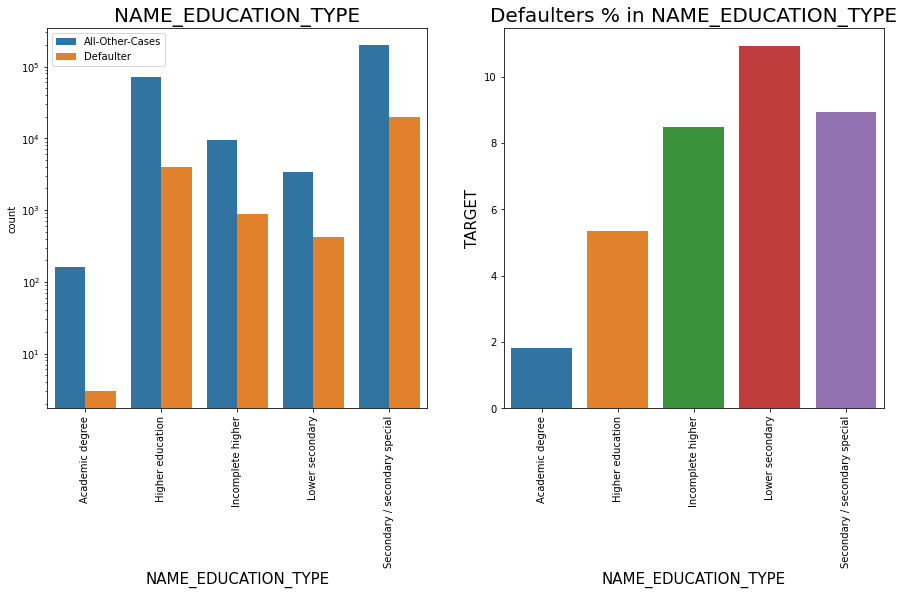

In [536]:
Uni_curr_target('NAME_EDUCATION_TYPE')

Comments:

Majority of clients have Secondary/secondary special education, followed by clients with Higher education.

Very few clients have an academic degree

Lower secondary category have highest rate of defaulting.

People with Academic degree are least likely to default.

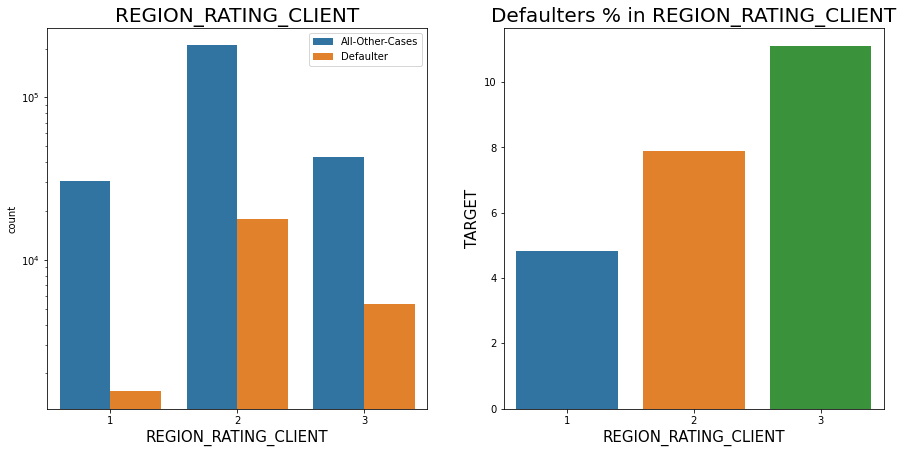

In [537]:
Uni_curr_target('REGION_RATING_CLIENT')

More people from second tier regions tend to apply for loans.

We can infer that people living in better areas(Rating 3) tend contribute more to the defaulters by their weightage.

People living in 1 rated areas are safer for loan approval.

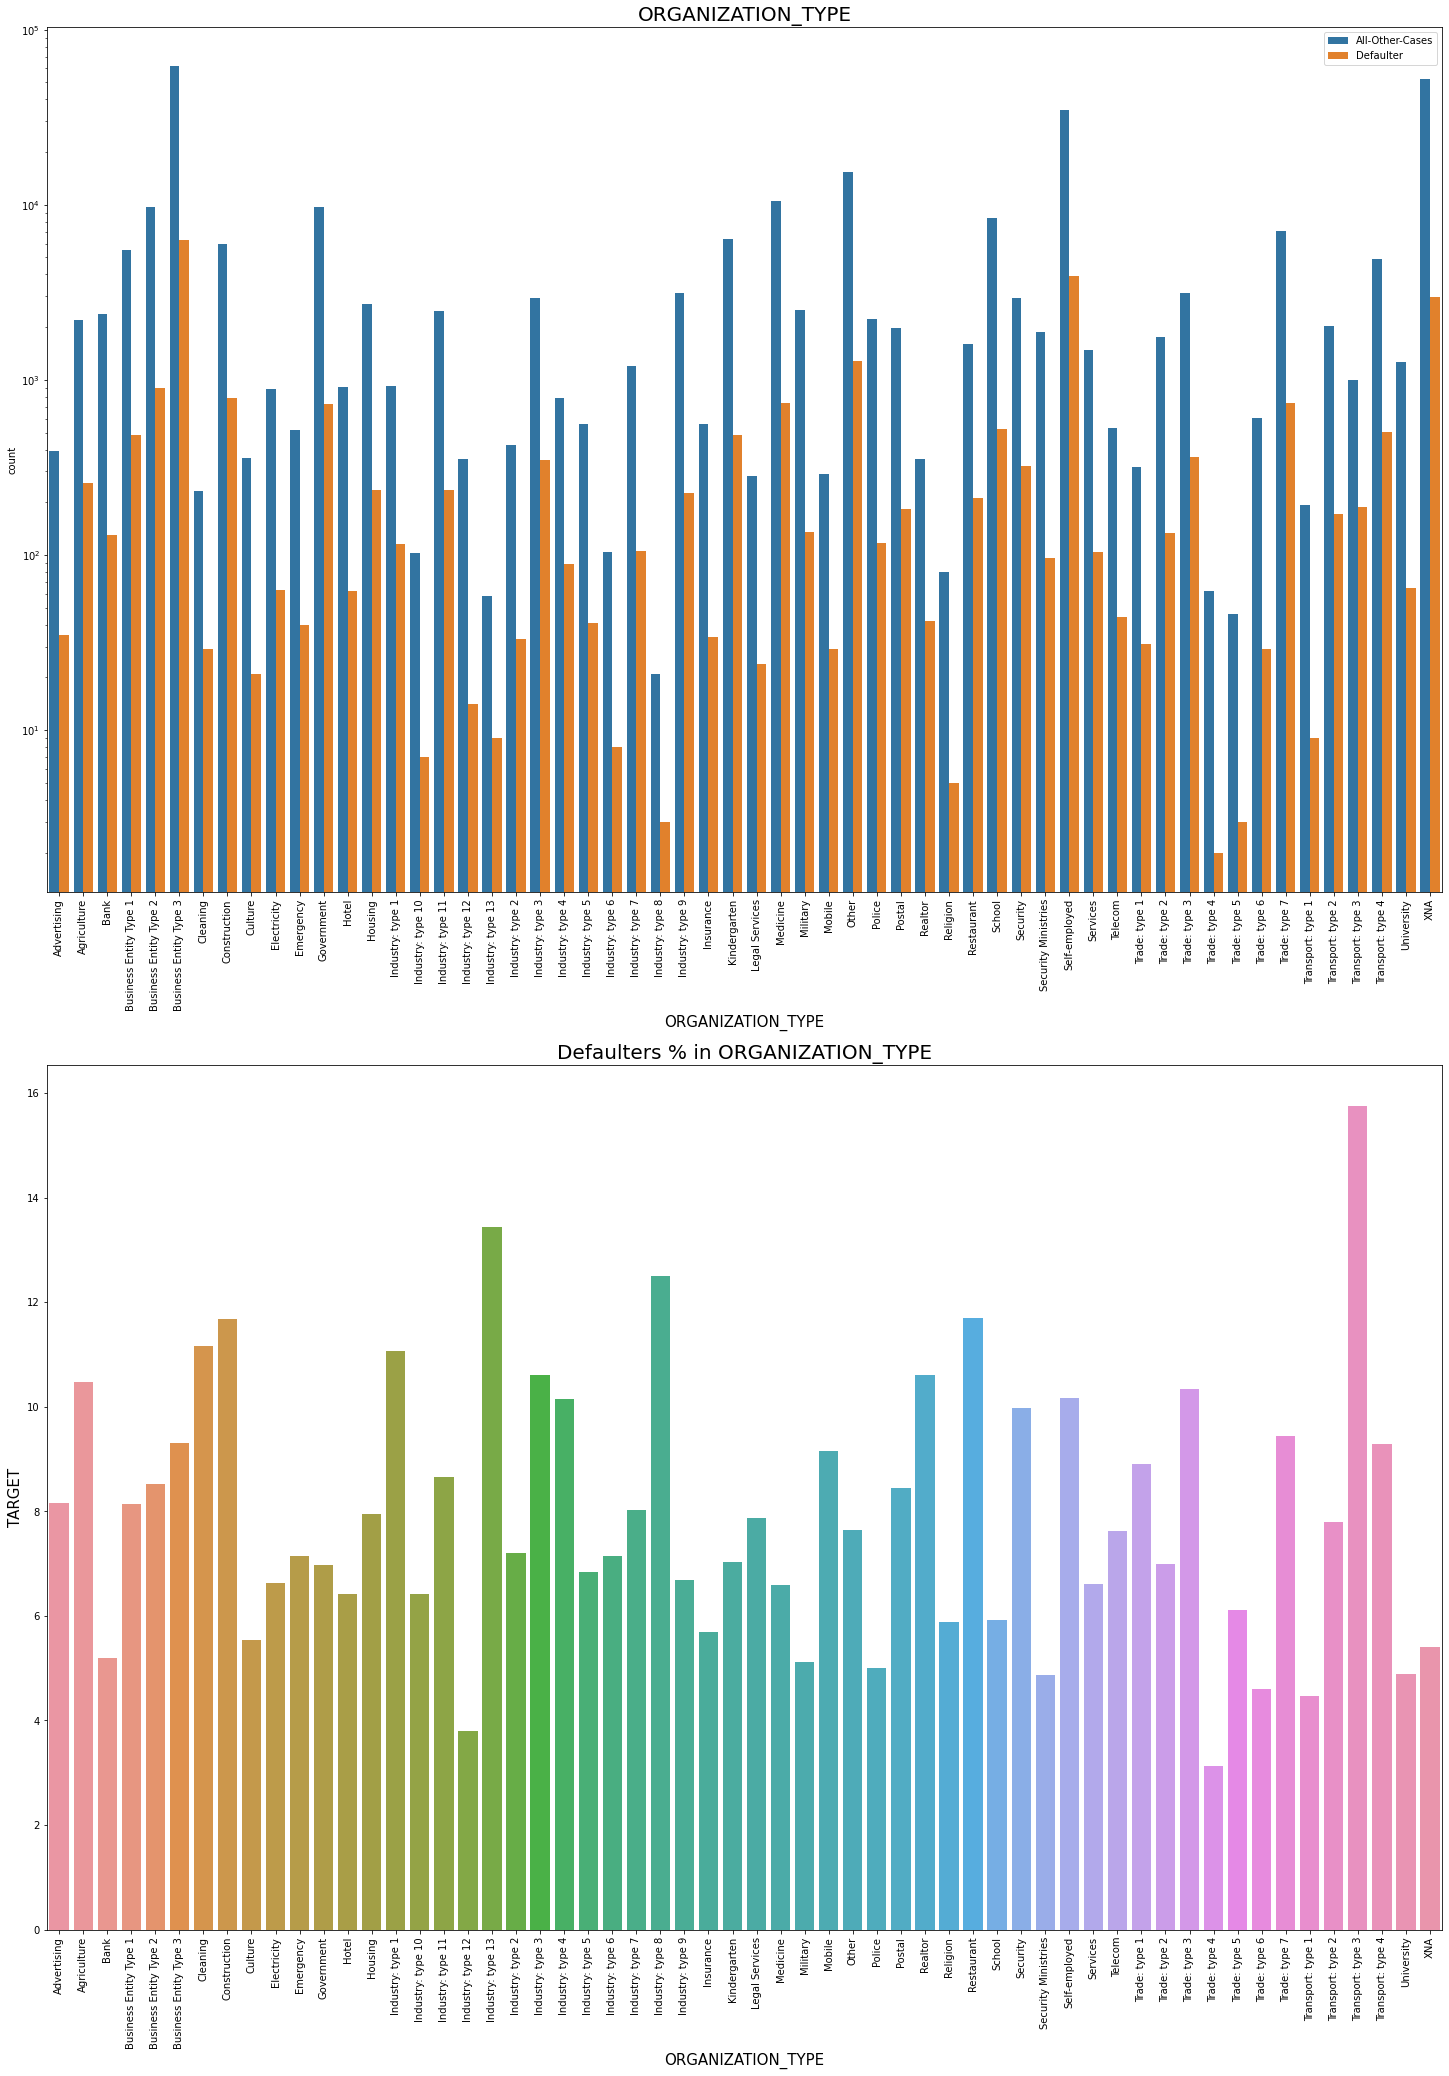

In [538]:
Uni_curr_target('ORGANIZATION_TYPE')

Comments:
Most of the people application for loan are from Business Entity Type 3

For a very high number of applications, Organization type information is unavailable(XNA)

Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.

Organizations with highest percent of loans not repaid are Transport: type 3 , Industry: type 13, Industry: type 8  and Restaurant.

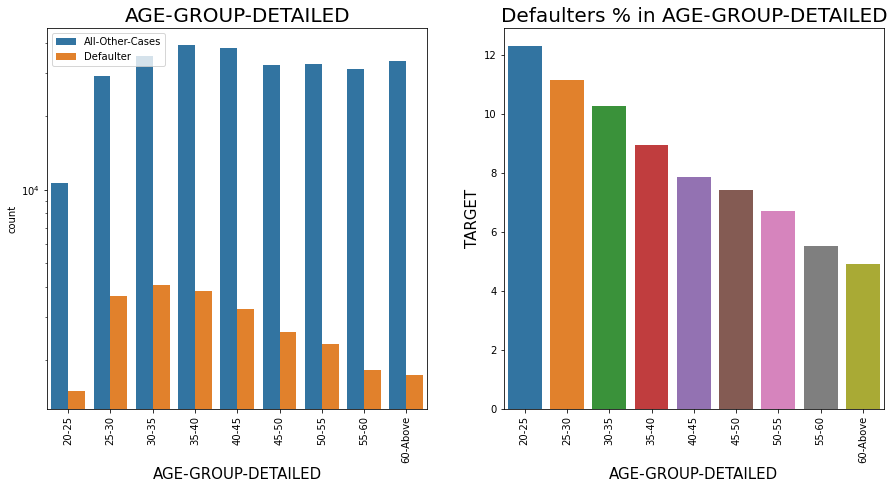

In [539]:
Uni_curr_target('AGE-GROUP-DETAILED')

We see that [30-35] age group tend to default more often. So they are the riskiest people to loan to.
With increasing age group, people tend to default less starting from the age 35.

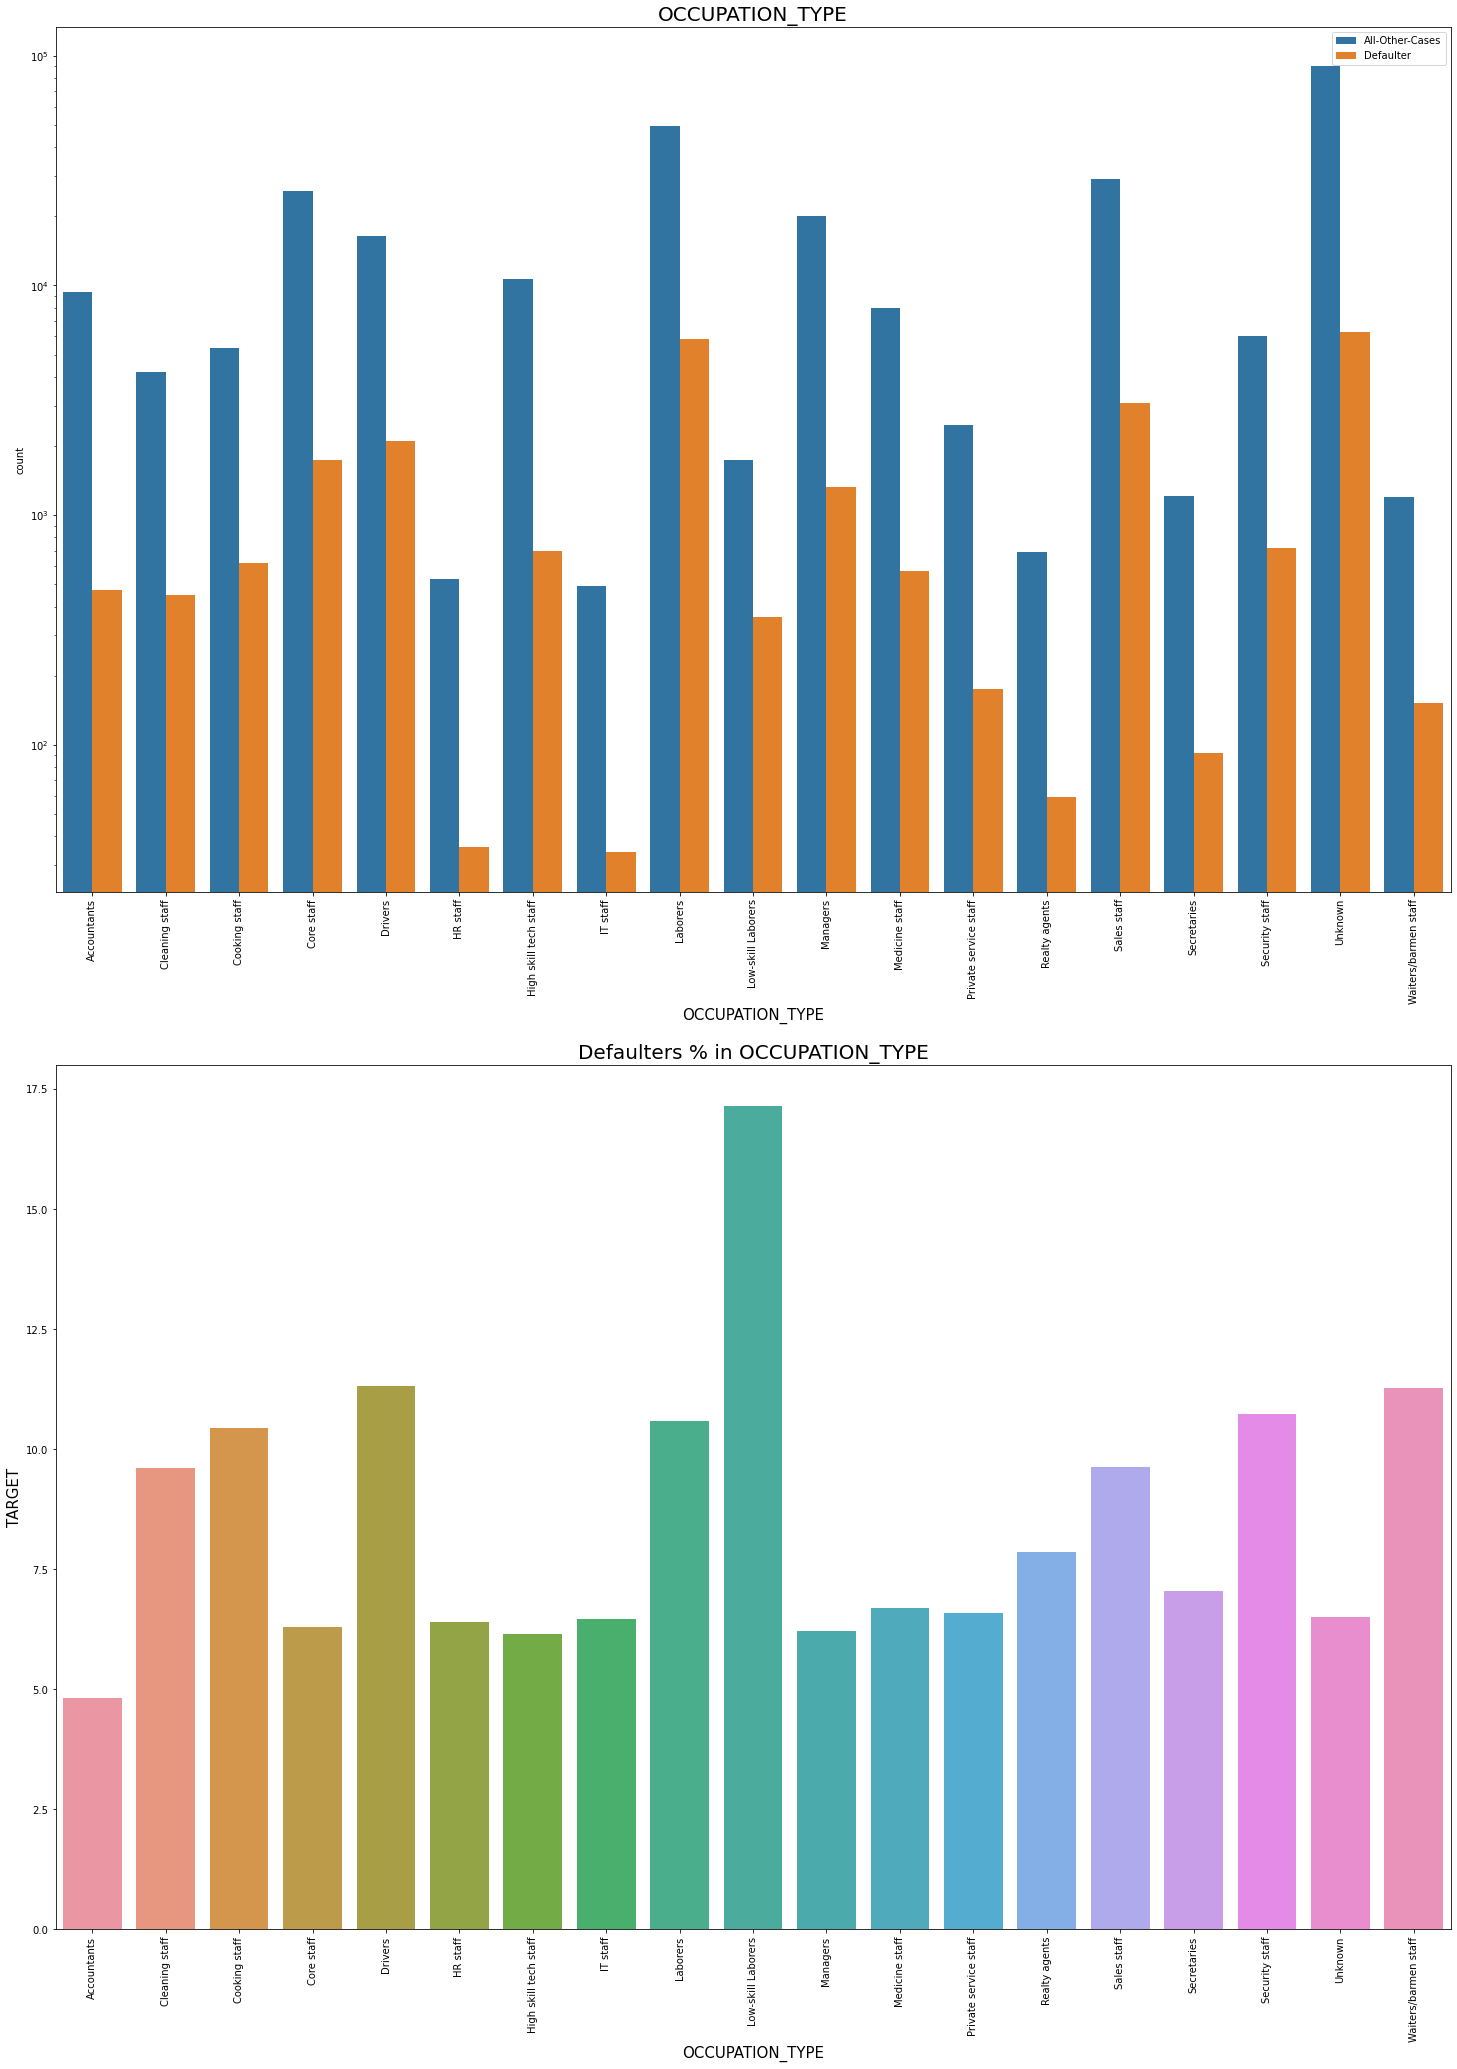

In [540]:
Uni_curr_target('OCCUPATION_TYPE')

Comments:

Most of the loans are taken by Laborers, followed by Sales staff.

IT staff are less likely to apply for Loan.

Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.


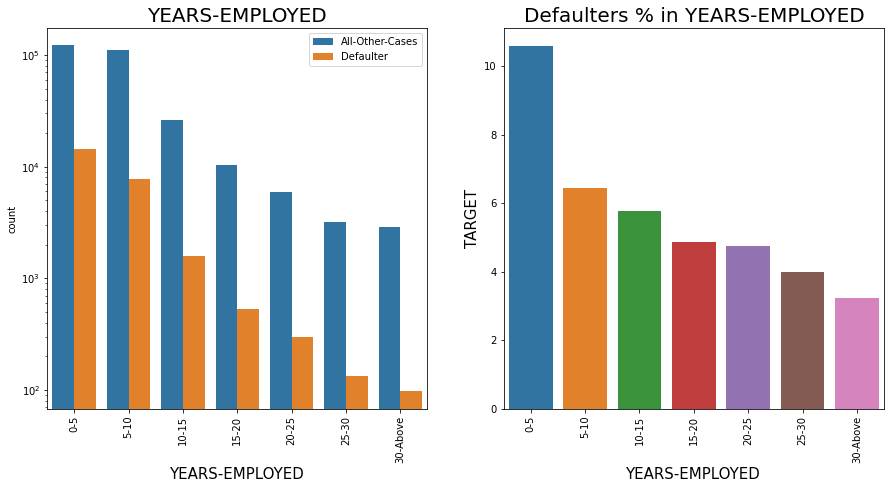

In [541]:
Uni_curr_target('YEARS-EMPLOYED')

Comments:

Majority of the applicants having working experience between 0-5 years are defaulters. 

With increase of employment year, defaulting rate is gradually decreasing.

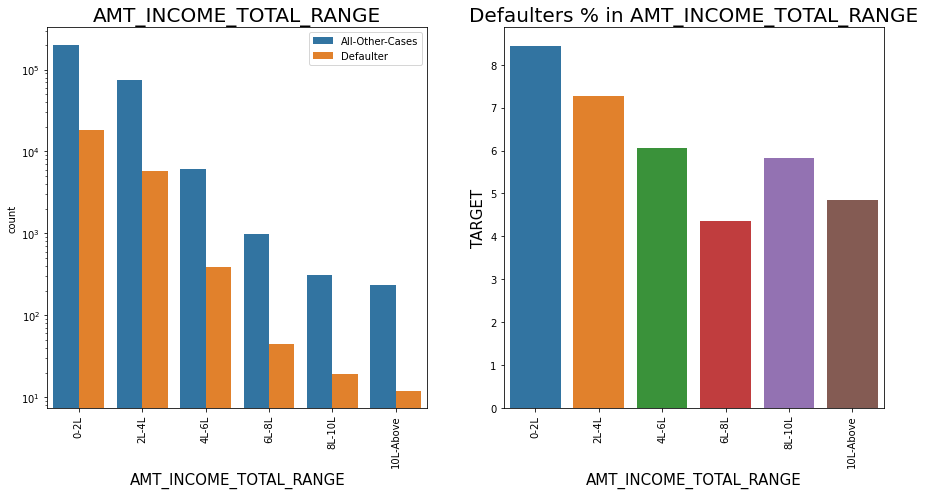

In [542]:
Uni_curr_target('AMT_INCOME_TOTAL_RANGE')

Majority of the applications have Income total less than 4 Lakhs.
Application with Income less than 4 Lakhs has high probability of defaulting
Applicant with Income 6-10 Lakhs are less likely to default.

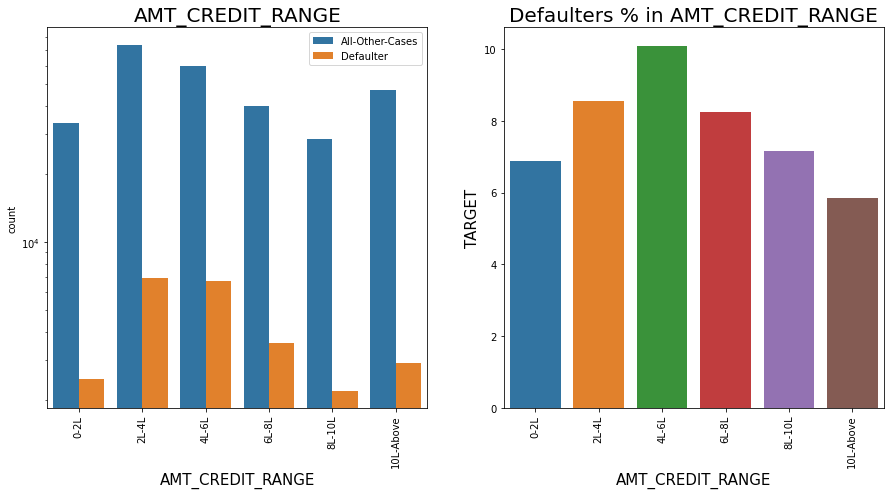

In [543]:
Uni_curr_target('AMT_CREDIT_RANGE')

There are high number of applicants have loan in range of 2-4 Lakhs followed by 4-6 Lakh range

People who get loan for 2-6 Lakhs have most number of defaulters than other loan range.

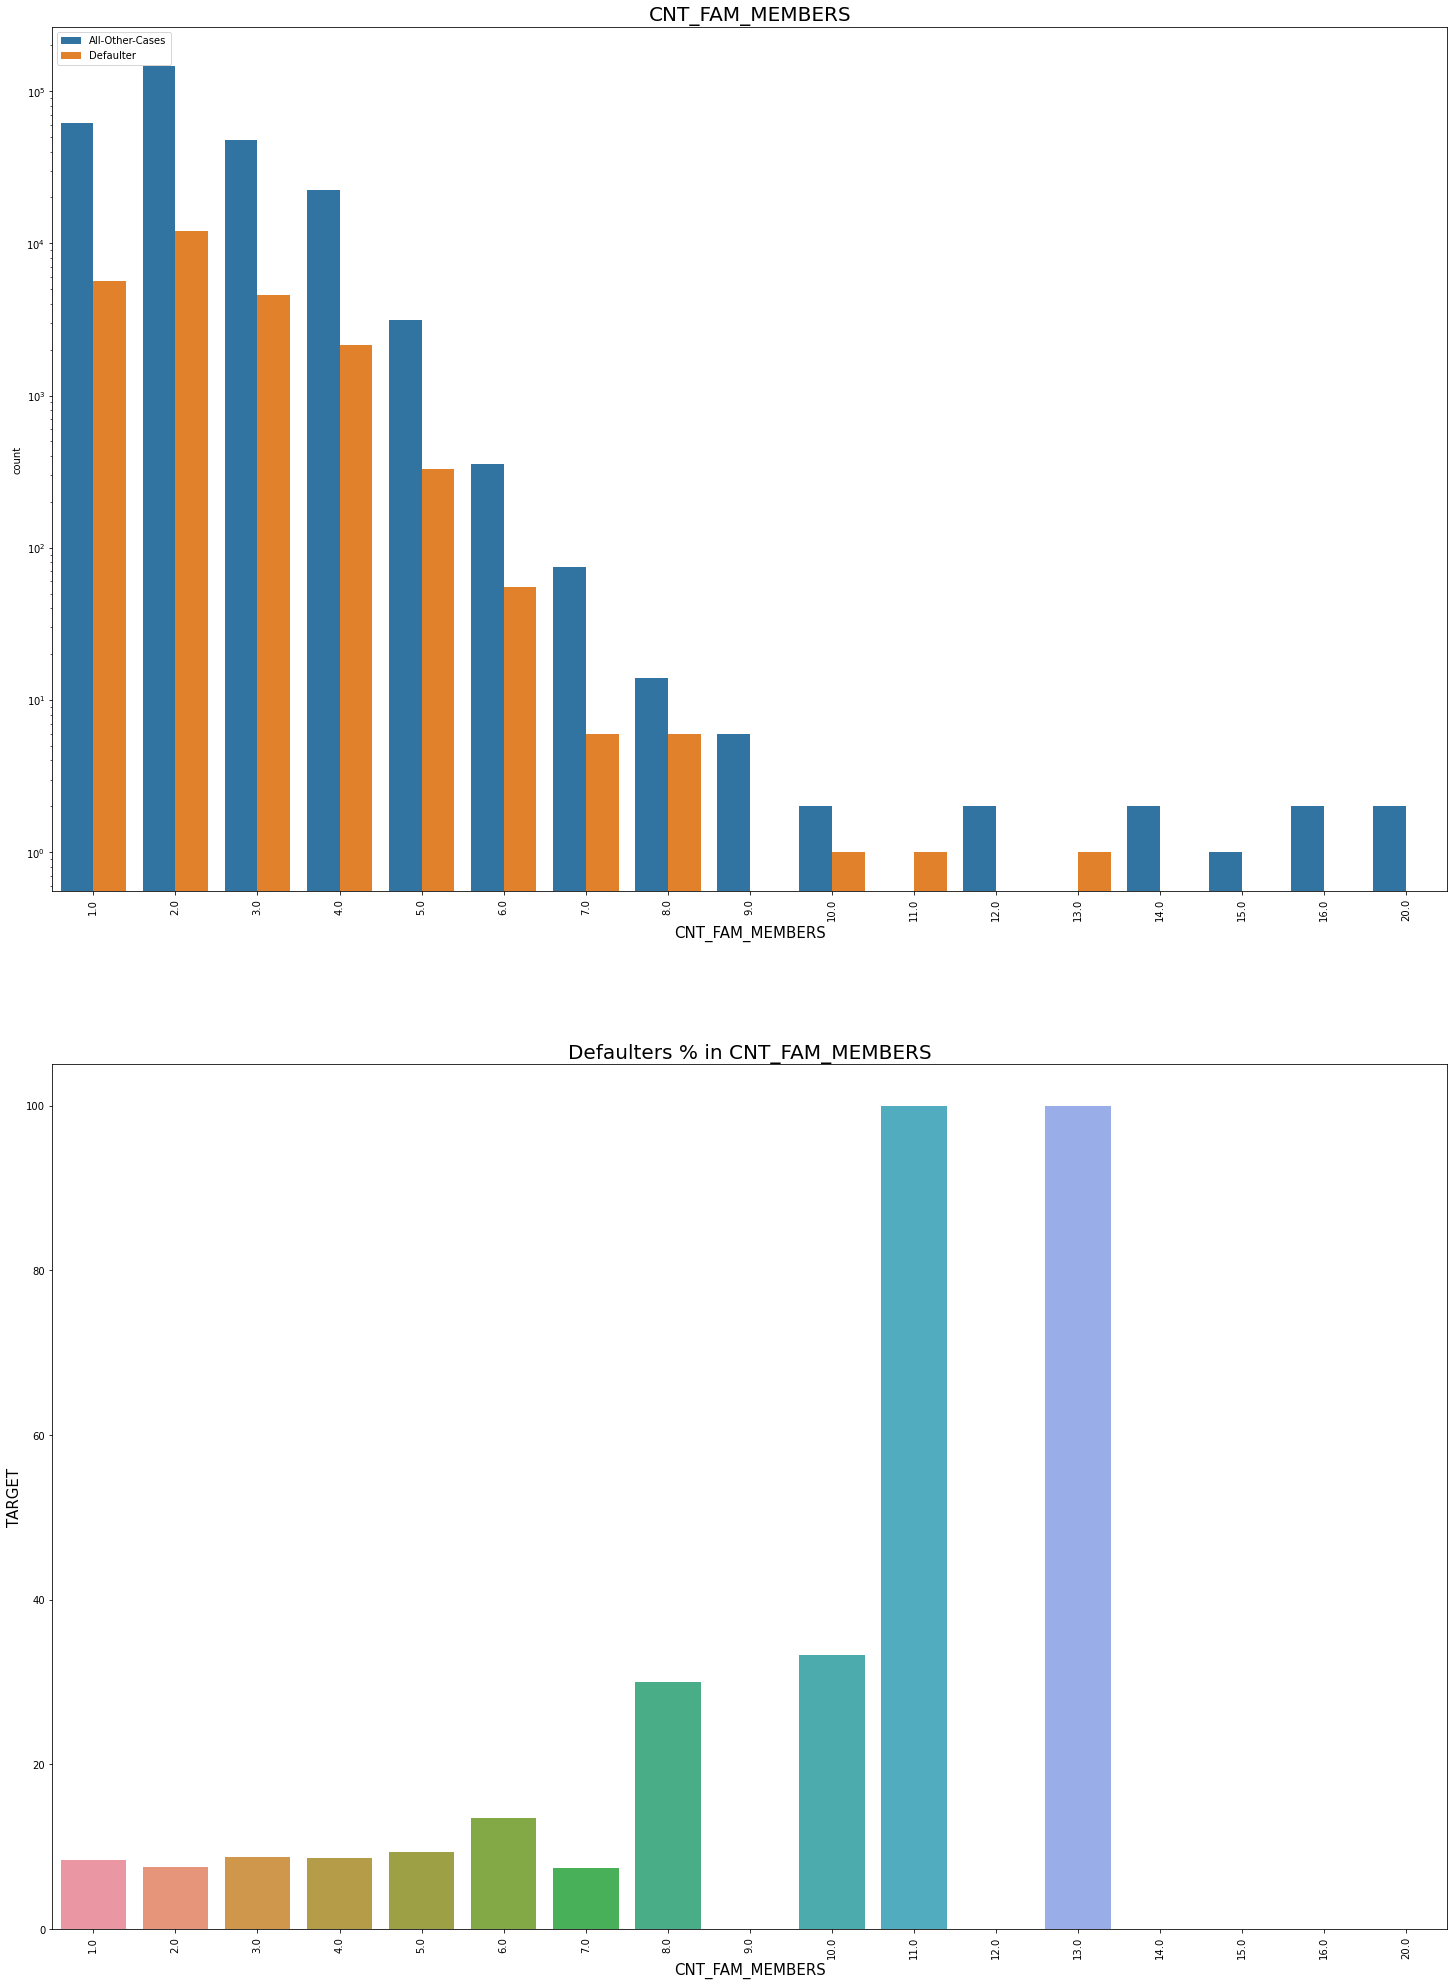

In [544]:
Uni_curr_target('CNT_FAM_MEMBERS')

We can see that a family of 1-3 applies loan more often than the other families


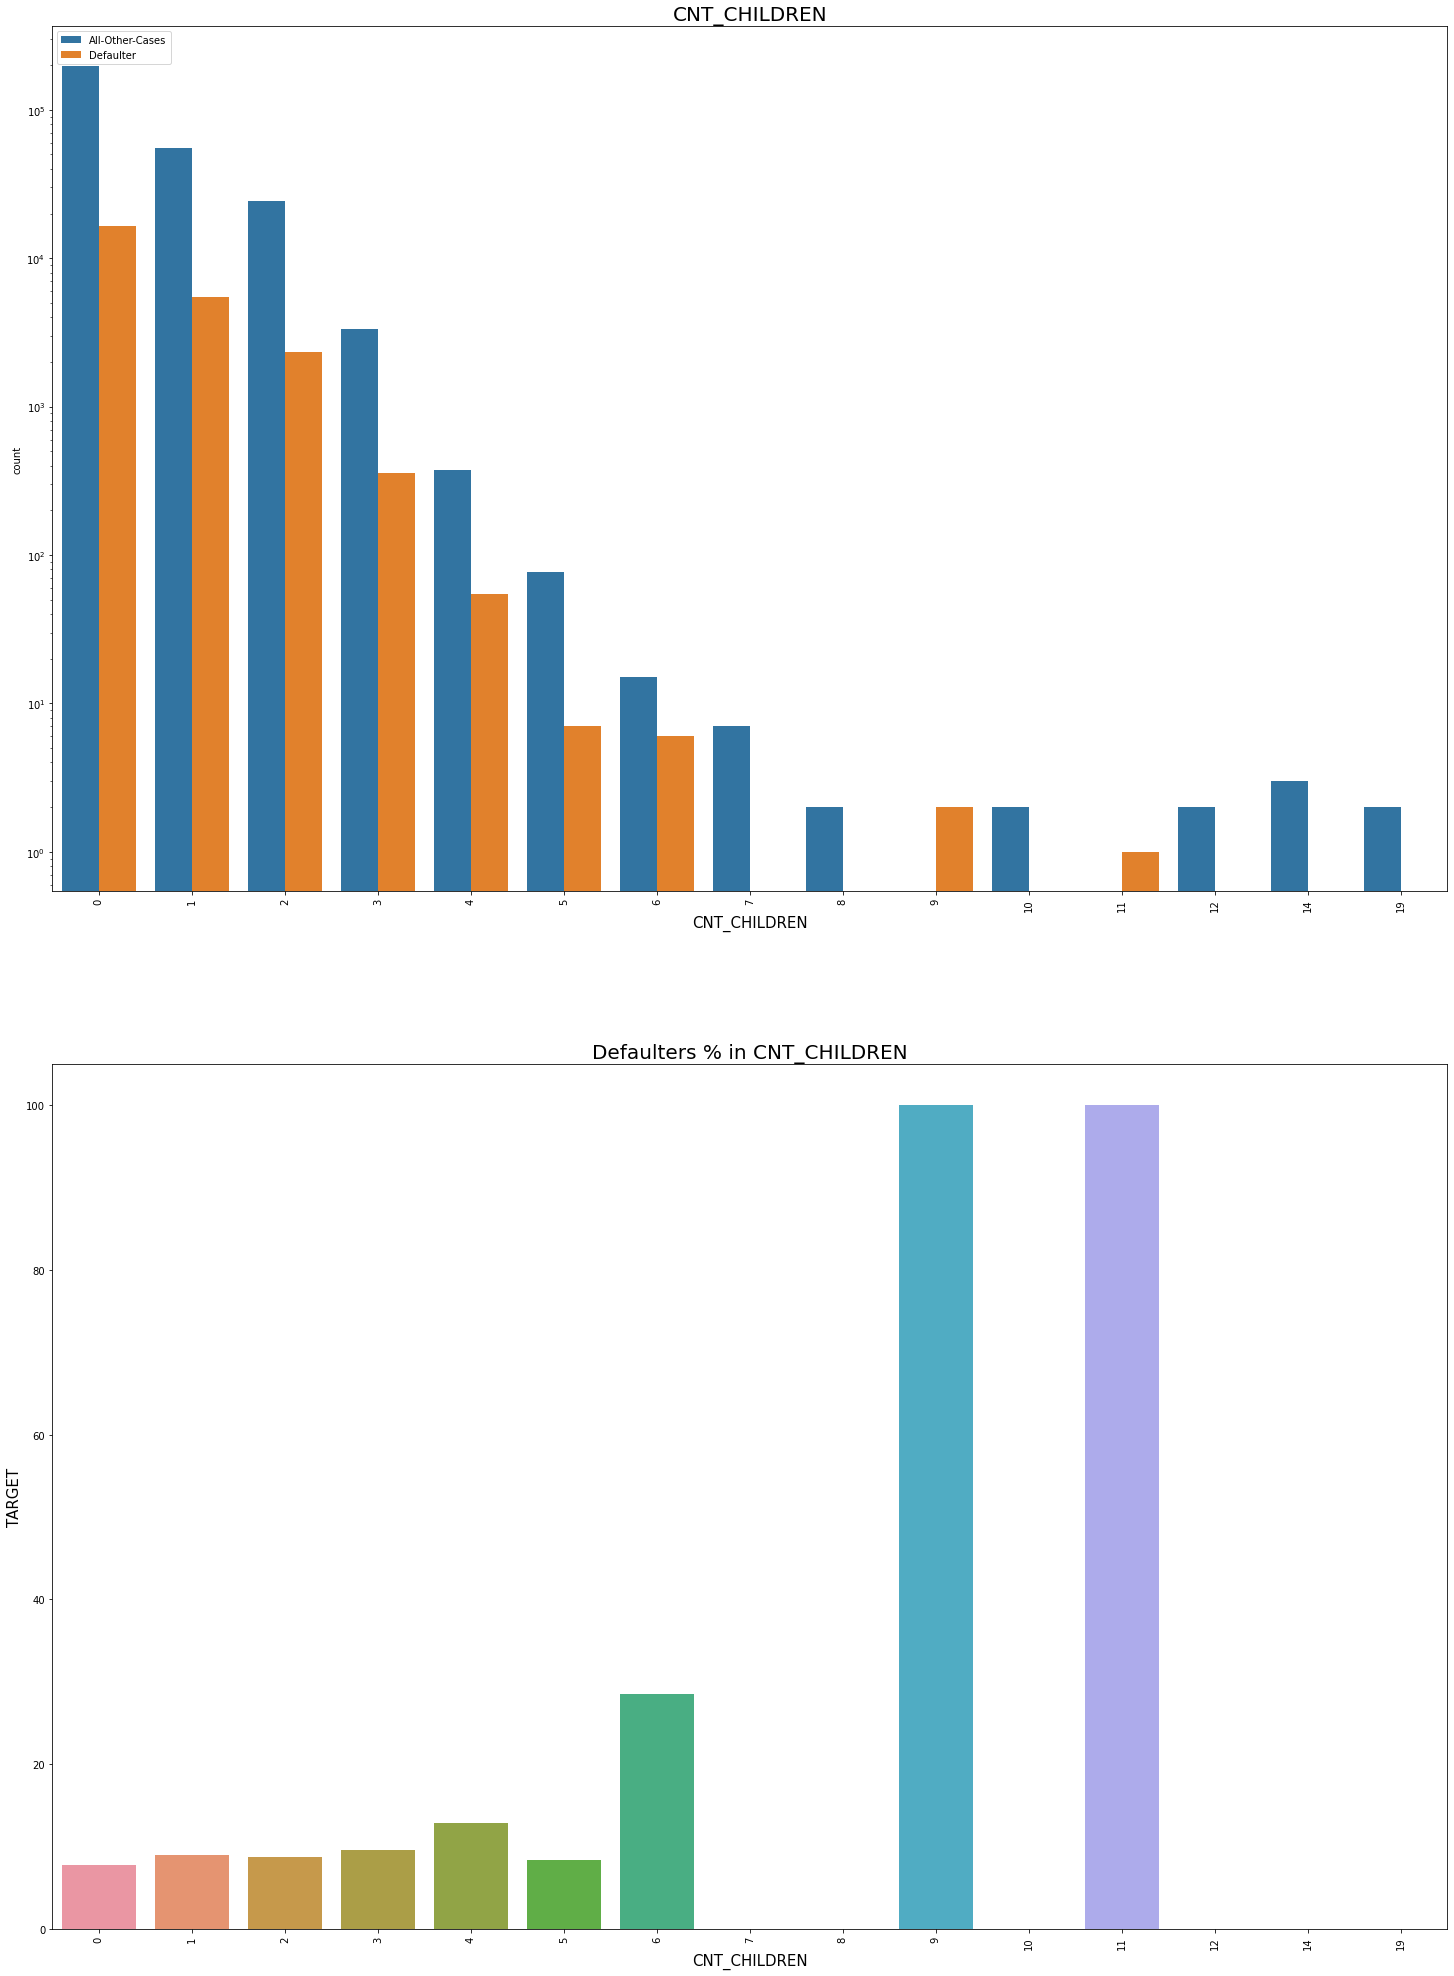

In [545]:
Uni_curr_target('CNT_CHILDREN')

Comments:
Most of the applicants do not have children
Very few clients have more than 3 children.

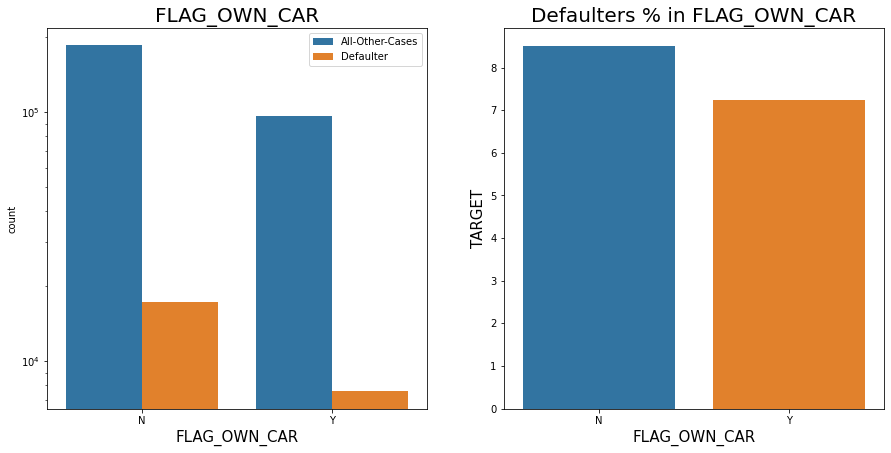

In [546]:
Uni_curr_target('FLAG_OWN_CAR')

More Than 60% of People Don't Own a Car.

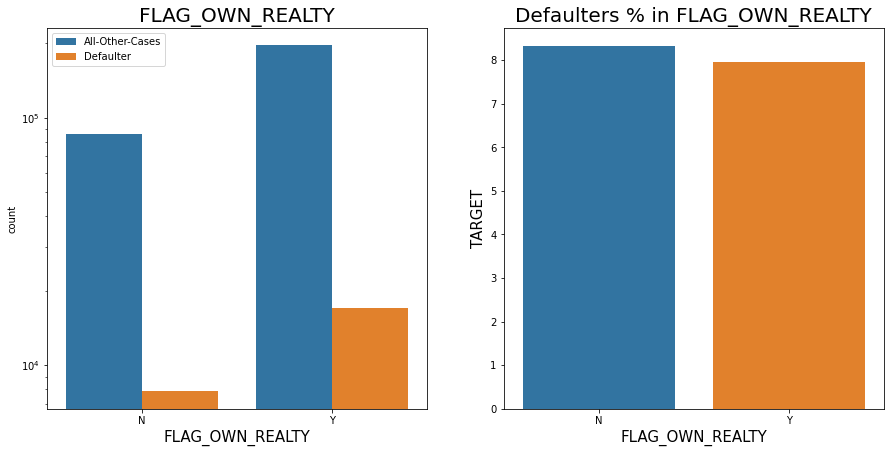

In [547]:
Uni_curr_target('FLAG_OWN_REALTY')

The clients who own real estate are more than double of the ones that don't own.
The both categories percentages are almost same. Thus we can infer that there is no correlation between owning a reality and defaulting the loan.

In [548]:
curr_app_df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


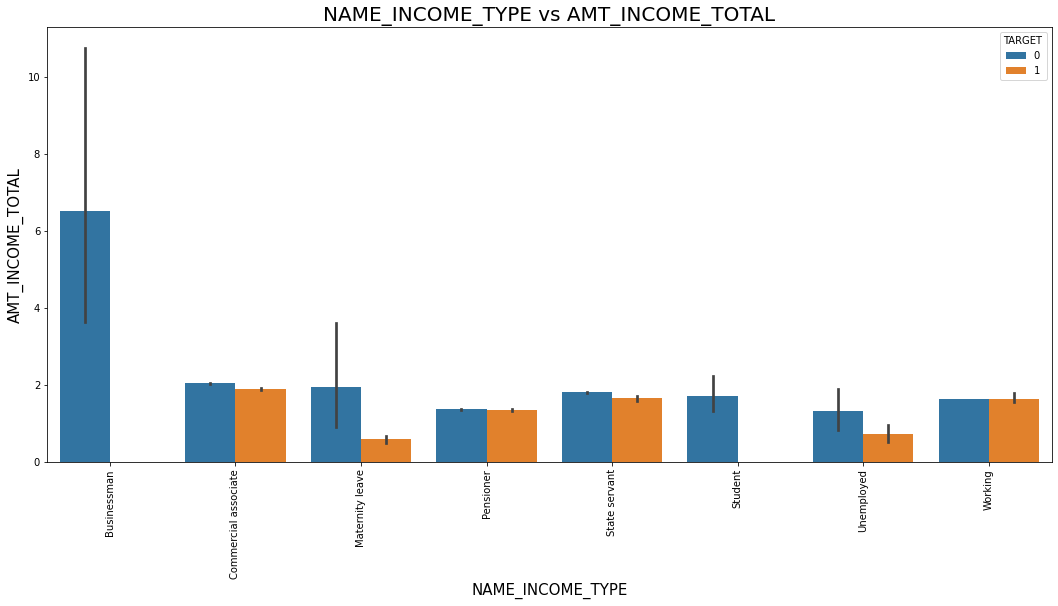

In [549]:
Bi_cat_num_curr('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

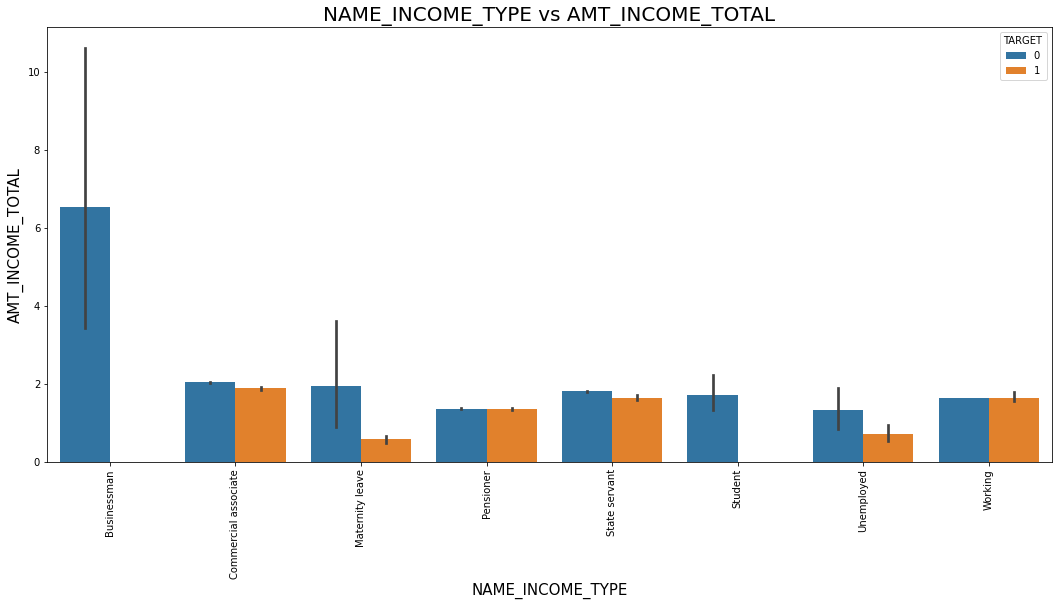

In [550]:
Bi_cat_num_curr('NAME_INCOME_TYPE','AMT_INCOME_TOTAL')

Comments:

It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

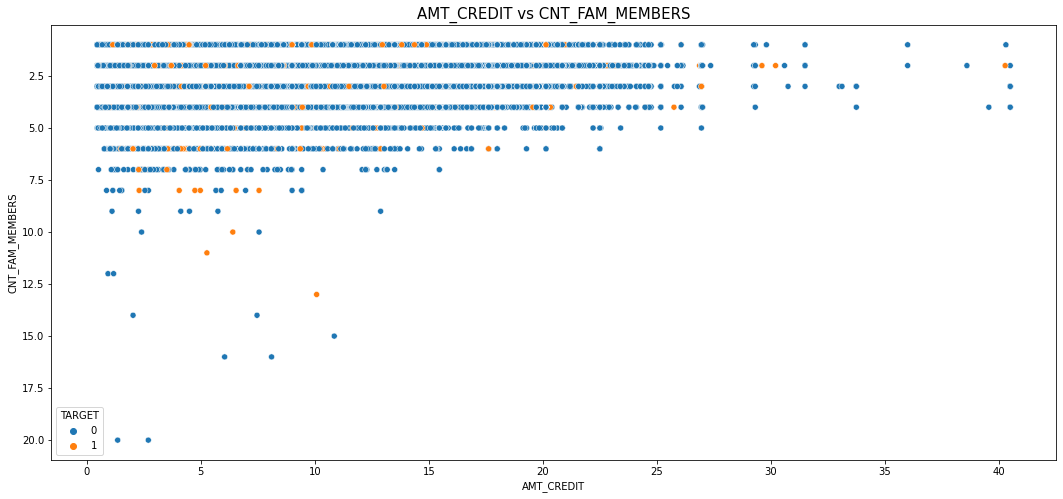

In [551]:
Bi_num_curr('AMT_CREDIT','CNT_FAM_MEMBERS')

We can see that the density in the left corner for both target variables, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often

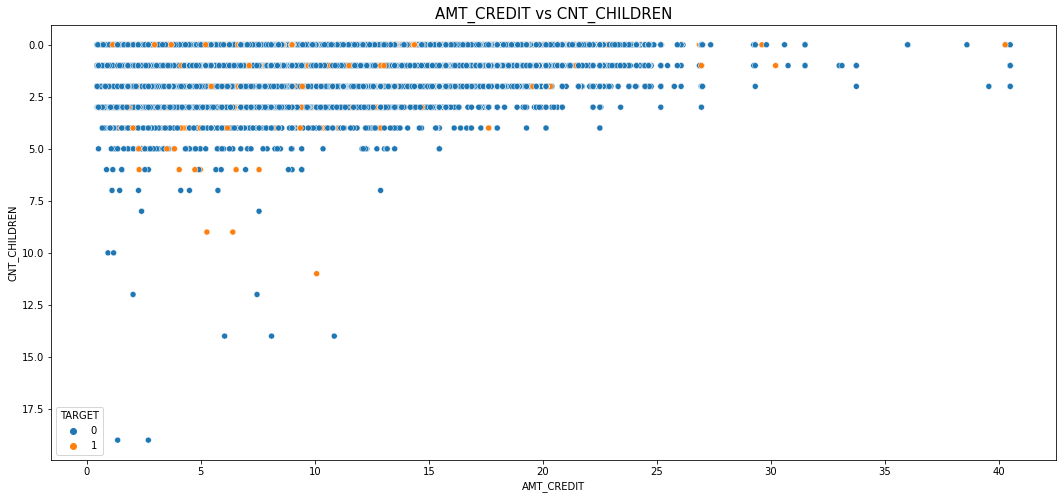

In [552]:
Bi_num_curr('AMT_CREDIT','CNT_CHILDREN')

We can see that the density in the left corner for both target variables, so the people are equally likely to default if the number of children and the AMT_CREDIT is low.

In [553]:
#Selecting columns for correlation.
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Def_corr_df = Defaulter_df[cols_for_correlation]
Other_corr_df = Other_Cases_df[cols_for_correlation]

In [554]:
#Getting the top 10 correlation for Defaulting
corr_default = Def_corr_df.corr()
corrdef_df = corr_default.where(np.triu(np.ones(corr_default.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdef_df.columns=['Var-X','Var-Y','Correlation']
corrdef_df.dropna(subset=['Correlation'],inplace=True)
corrdef_df['Abs_Correlation']=corrdef_df['Correlation'].abs()
corrdef_df = corrdef_df.sort_values(by=['Abs_Correlation'], ascending=False)
corrdef_df.head(10)

,Var-X,Var-Y,Correlation,Abs_Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
43,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
131,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
152,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,-0.272169,0.272169
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159,0.264159
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.247511,0.247511
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090


In [555]:
#Getting the top 10 correlation for Other Cases
corr_Other = Other_corr_df.corr()
corrOth_df = corr_Other.where(np.triu(np.ones(corr_Other.shape),k=1).astype(np.bool)).unstack().reset_index()
corrOth_df.columns=['Var-X','Var-Y','Correlation']
corrOth_df.dropna(subset=['Correlation'],inplace=True)
corrOth_df['Abs_Correlation']=corrOth_df['Correlation'].abs()
corrOth_df = corrOth_df.sort_values(by=['Abs_Correlation'], ascending=False)
corrOth_df.head(10)

,Var-X,Var-Y,Correlation,Abs_Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987022,0.987022
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.776433,0.776433
43,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
131,DAYS_EMPLOYED,DAYS_BIRTH,0.626114,0.626114
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349426,0.349426
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
152,DAYS_REGISTRATION,DAYS_BIRTH,0.333151,0.333151
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314,0.271314


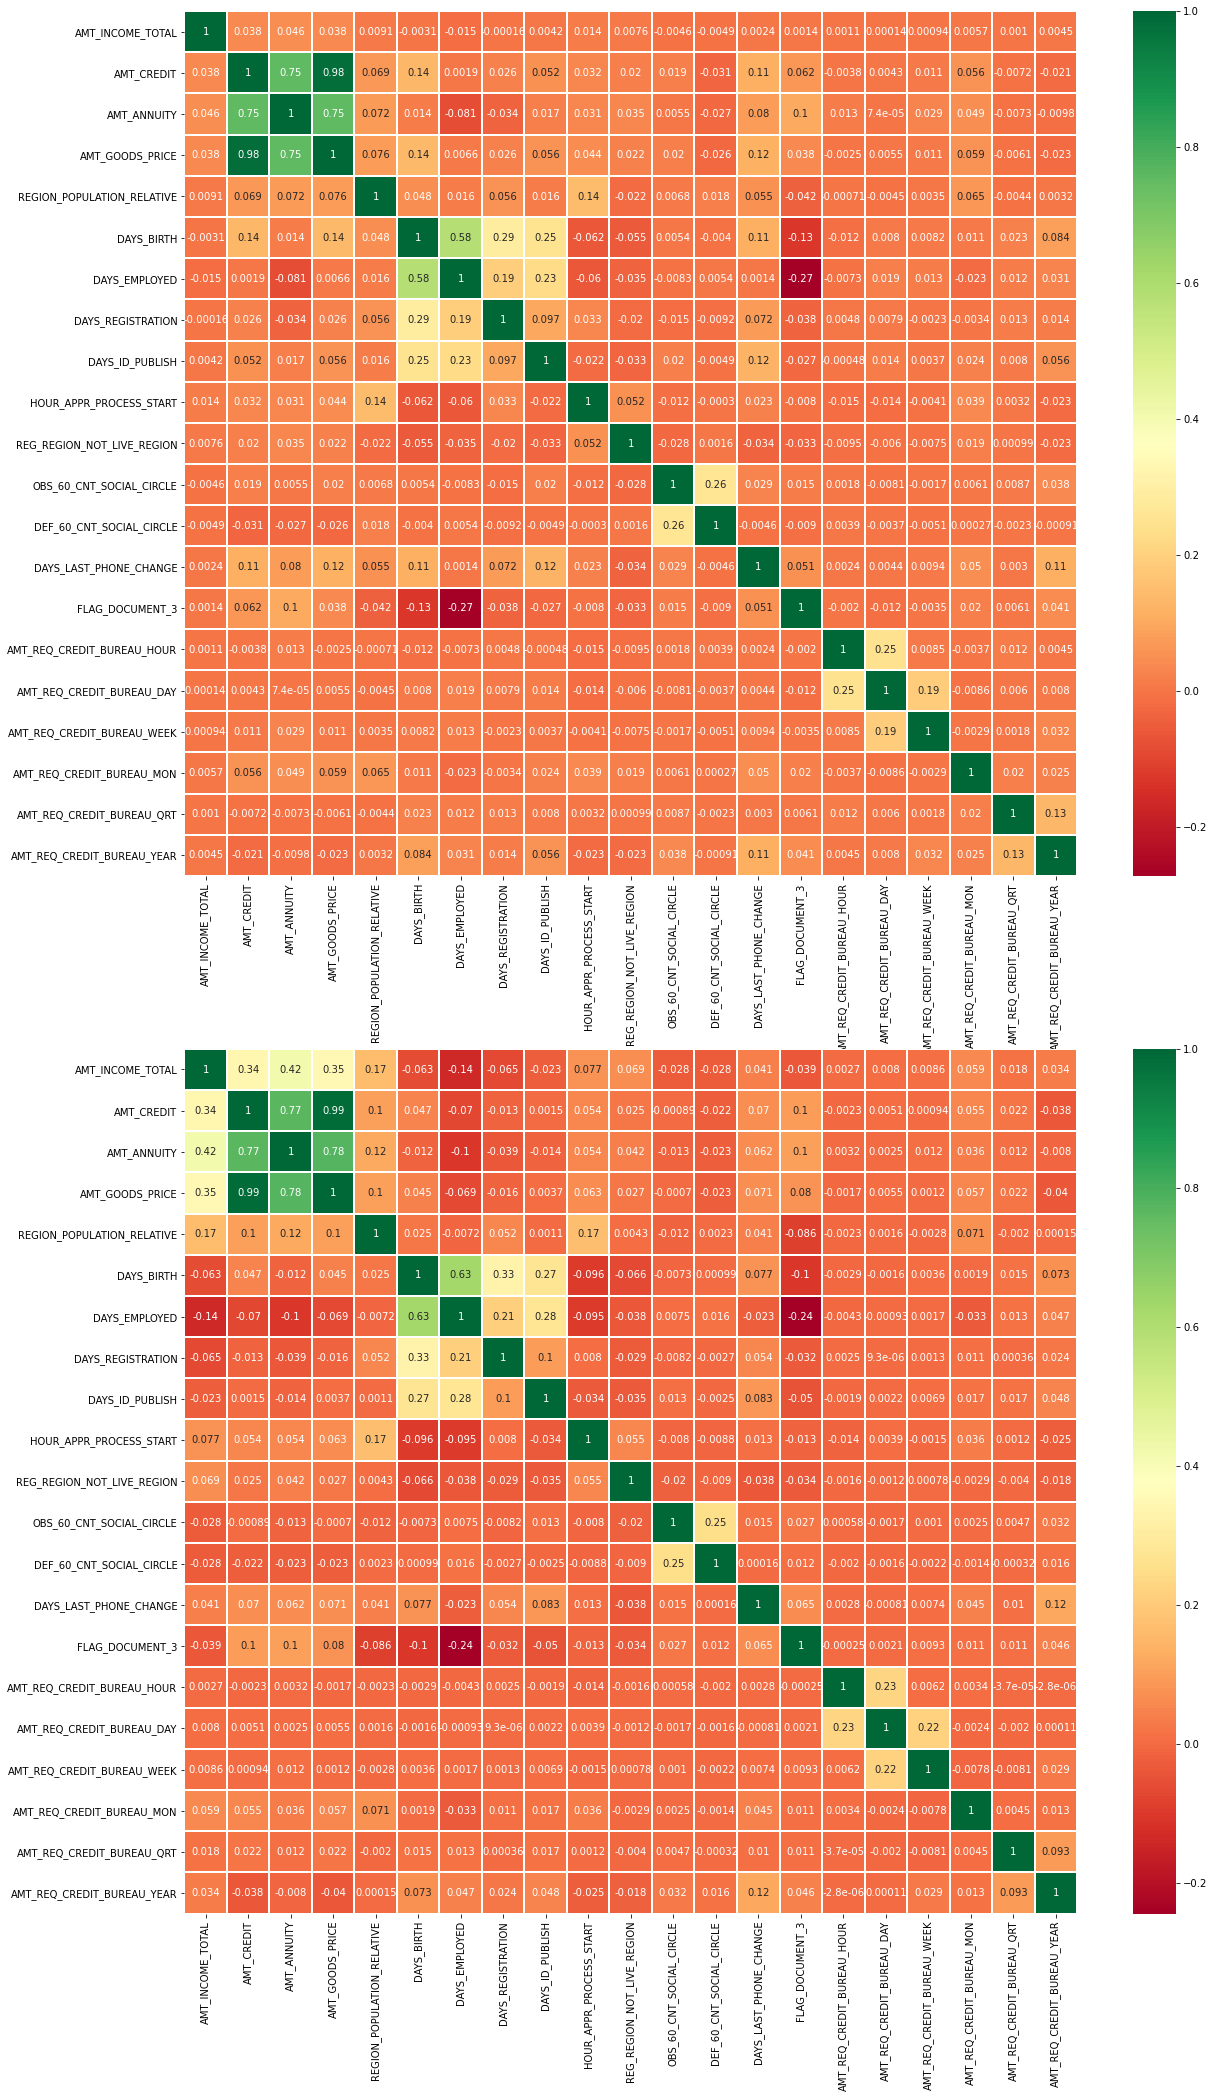

In [556]:
#Correlation for both Defaulters and Other Cases.
fig = plt.figure(figsize=(20,35))
plt.subplot(2,1,1)
sns.heatmap(Def_corr_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

plt.subplot(2,1,2)
sns.heatmap(Other_corr_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)
plt.show()

Comments:

Defaulters:

Credit amount is highly correlated with good price amount which is same as repayers.

Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)

We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.

Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.



All-Other Cases:

Credit amount is highly correlated with:

1--Goods Price Amount

2--Loan Annuity

3--Total Income

We can also see that repayers have high correlation in number of days employed.

## Univariate Numerical Analysis

In [557]:
AMNT_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

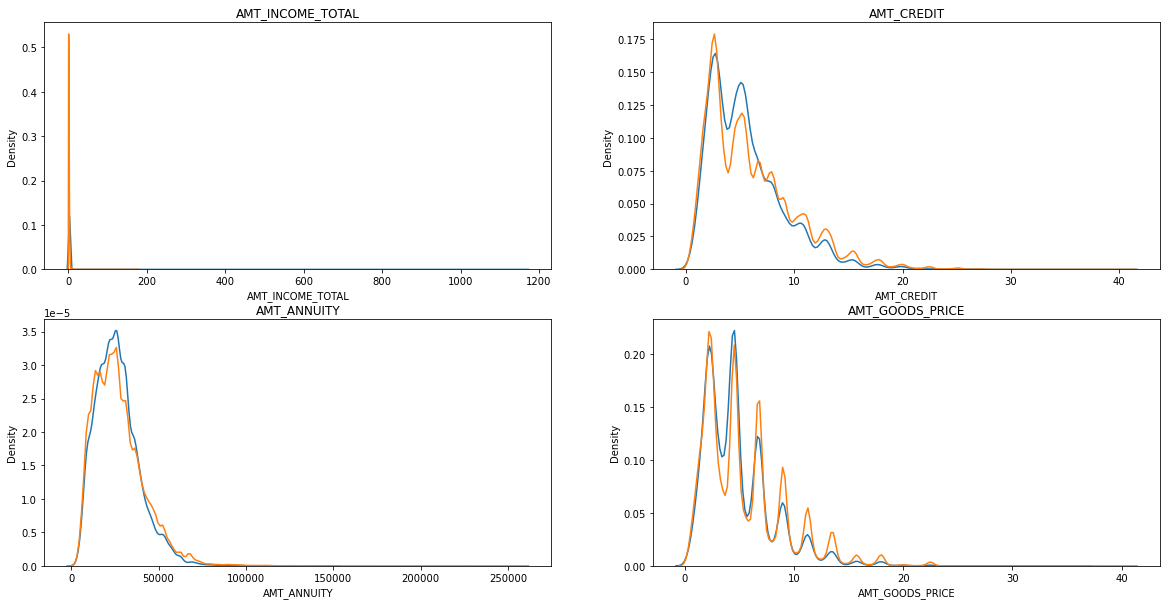

In [558]:
plt.figure(figsize=(20,10))
for i in range(len(AMNT_cols)):
    plt.subplot(2,2,i+1)
    plt.title(AMNT_cols[i])
    sns.distplot(Defaulter_df[AMNT_cols[i]], hist=False,label ="Defaulter")
    sns.distplot(Other_Cases_df[AMNT_cols[i]], hist=False, label ="All-Other-Cases")
    i=i+1
plt.show()

Comments:
    
Most no of loans are given for goods price below 10 lakhs

Most people pay annuity below 50K for the credit loan

Credit amount of the loan is mostly less then 10 lakhs

The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

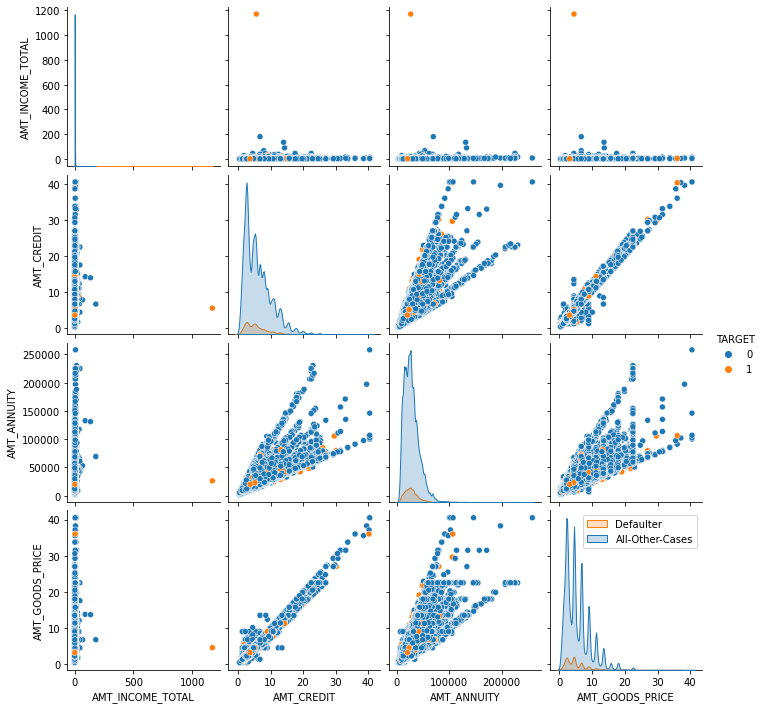

In [559]:
sns.pairplot(curr_app_df[AMNT_cols+['TARGET']],hue='TARGET')
plt.legend(labels=['Defaulter','All-Other-Cases'])
plt.show()

People least likely to default if any of CREDIT,GOODS PRICE,ANNUITY are high

# Previous Application Data

In [561]:
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [562]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning

In [563]:
Null_perc_features(prev_app_df)

,Features,Null_percent
0,RATE_INTEREST_PRIVILEGED,99.64
1,RATE_INTEREST_PRIMARY,99.64
2,AMT_DOWN_PAYMENT,53.64
3,RATE_DOWN_PAYMENT,53.64
4,NAME_TYPE_SUITE,49.12
5,NFLAG_INSURED_ON_APPROVAL,40.30
6,DAYS_TERMINATION,40.30
7,DAYS_LAST_DUE,40.30
8,DAYS_LAST_DUE_1ST_VERSION,40.30
9,DAYS_FIRST_DUE,40.30


In [564]:
True_Null_Features(prev_app_df)

,Features,Null_percent
0,RATE_INTEREST_PRIVILEGED,99.64
1,RATE_INTEREST_PRIMARY,99.64
2,AMT_DOWN_PAYMENT,53.64
3,RATE_DOWN_PAYMENT,53.64
4,NAME_TYPE_SUITE,49.12
5,NFLAG_INSURED_ON_APPROVAL,40.30
6,DAYS_TERMINATION,40.30
7,DAYS_LAST_DUE,40.30
8,DAYS_LAST_DUE_1ST_VERSION,40.30
9,DAYS_FIRST_DUE,40.30


In [565]:
prev_app_df = drop_columns(prev_app_df,percent=40)

In [566]:
True_Null_Features(prev_app_df) 

,Features,Null_percent
0,AMT_GOODS_PRICE,23.08
1,AMT_ANNUITY,22.29
2,CNT_PAYMENT,22.29
3,PRODUCT_COMBINATION,0.02


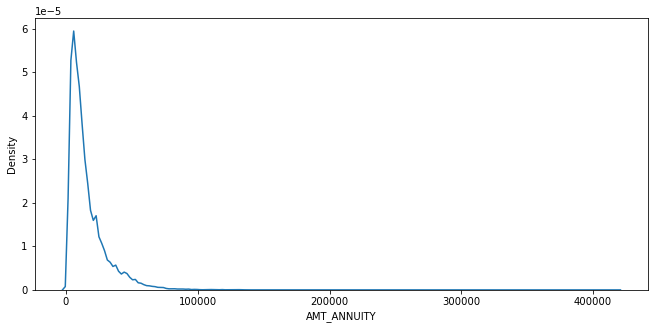

In [567]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(11,5))
sns.kdeplot(prev_app_df['AMT_ANNUITY'])
plt.show()

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with median.

In [568]:
prev_app_df['AMT_ANNUITY'].fillna(prev_app_df['AMT_ANNUITY'].median(),inplace = True)

In [569]:
prev_app_df['AMT_ANNUITY'].isnull().sum()

0

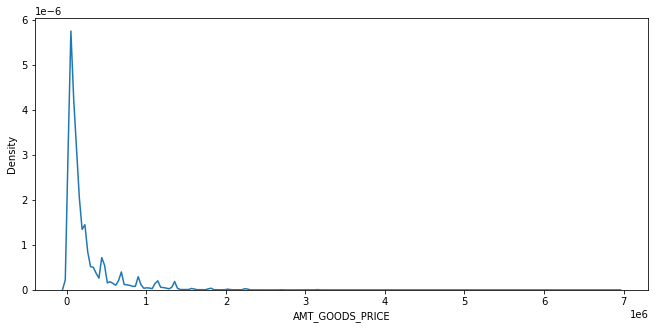

In [570]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(11,5))
sns.kdeplot(prev_app_df['AMT_GOODS_PRICE'])
plt.show()

There are several peaks along the distribution. Let's impute using the mode, mean and median and observe for the right metric to be imputed.

In [571]:
amt_goods_df = pd.DataFrame() 
amt_goods_df['AMT_GOODS_PRICE_mode'] = prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].mode()[0])
amt_goods_df['AMT_GOODS_PRICE_median'] = prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].median())
amt_goods_df['AMT_GOODS_PRICE_mean'] = prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

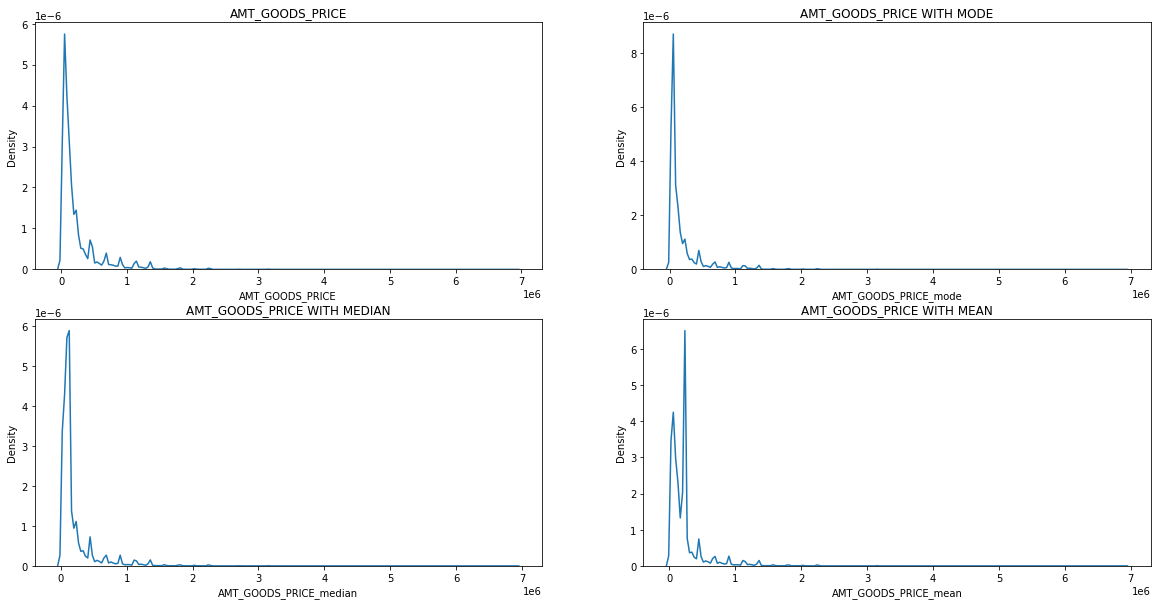

In [572]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title('AMT_GOODS_PRICE')
sns.kdeplot(prev_app_df['AMT_GOODS_PRICE'])
plt.subplot(2,2,2)
plt.title('AMT_GOODS_PRICE WITH MODE')
sns.kdeplot(amt_goods_df['AMT_GOODS_PRICE_mode'])
plt.subplot(2,2,3)
plt.title('AMT_GOODS_PRICE WITH MEDIAN')
sns.kdeplot(amt_goods_df['AMT_GOODS_PRICE_median'])
plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE WITH MEAN')
sns.kdeplot(amt_goods_df['AMT_GOODS_PRICE_mean'])
plt.show()

The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values


In [573]:
prev_app_df['AMT_GOODS_PRICE'].fillna(prev_app_df['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [574]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

prev_app_df.loc[prev_app_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started

In [575]:
#imputing null values as 0

prev_app_df['CNT_PAYMENT'].fillna(0,inplace = True)

In [577]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

Outlier Analysis

In [578]:
prev_num_var = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','CNT_PAYMENT']

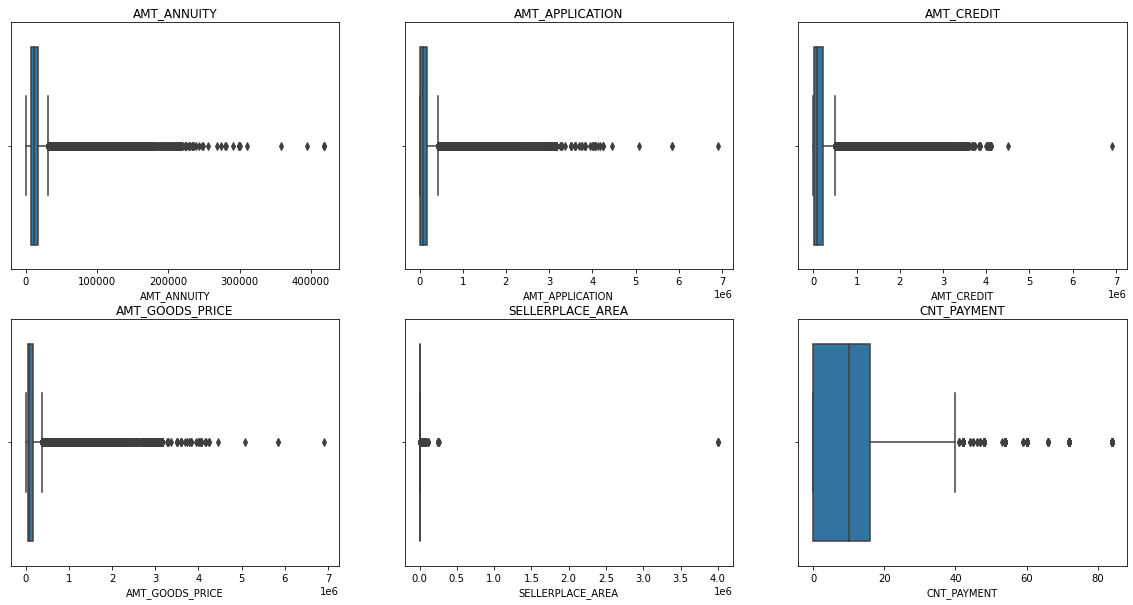

In [579]:
plt.figure(figsize=(20,10))
for i in range(len(prev_num_var)):
    plt.subplot(2,3,i+1)
    plt.title(prev_num_var[i])
    sns.boxplot(prev_app_df[prev_num_var[i]])
    i=i+1
plt.show()

It can be seen that in previous application data

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
CNT_PAYMENT has few outlier values.


In [ ]:
# Converting to Categorical Columns.
cat_cols_prev = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']
for col in cat_cols_prev:
      prev_app_df[col] = pd.Categorical(prev_app_df[col]) 

## Univariate Analysis W.R.T NAME_CONTRACT_STATUS (Categorical)

In [580]:
prev_app_df.select_dtypes(include=['object']).columns

Index(['WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT'], dtype='object')

In [581]:
def Uni_Prev(var):
    plt.figure(figsize=(15,5))
    sns.countplot(x=var, data=prev_app_df,hue='NAME_CONTRACT_STATUS')
    plt.title(f'Distribution of {var}')
    plt.ylabel('Total-Count')
    plt.yscale('log')
    plt.xticks( rotation=90)
    plt.show()

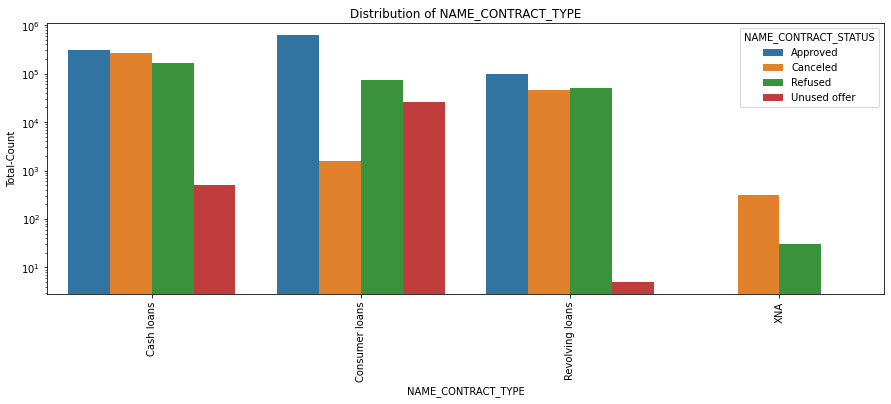

In [582]:
Uni_Prev('NAME_CONTRACT_TYPE')

From above we can see that, Bank approval rate for consumer loan is very high. May be because many types of consumer loans such as car loans, student loans, mortgage loans come with some type of collateral.


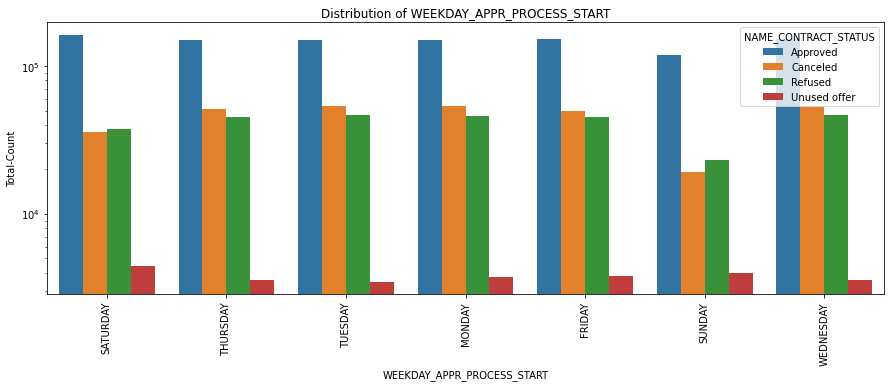

In [583]:
Uni_Prev('WEEKDAY_APPR_PROCESS_START')

No insights

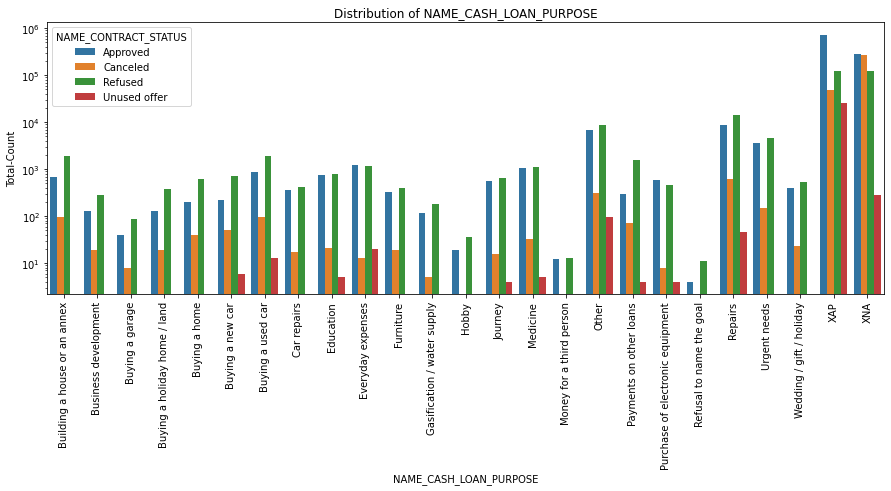

In [584]:
Uni_Prev('NAME_CASH_LOAN_PURPOSE')

In [585]:
prev_app_df['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

A large number of values are XNA,XAP where the purpose is not clear. Bank should put extra effort in collecting such information because it is one of the important metric to solve their business problems.


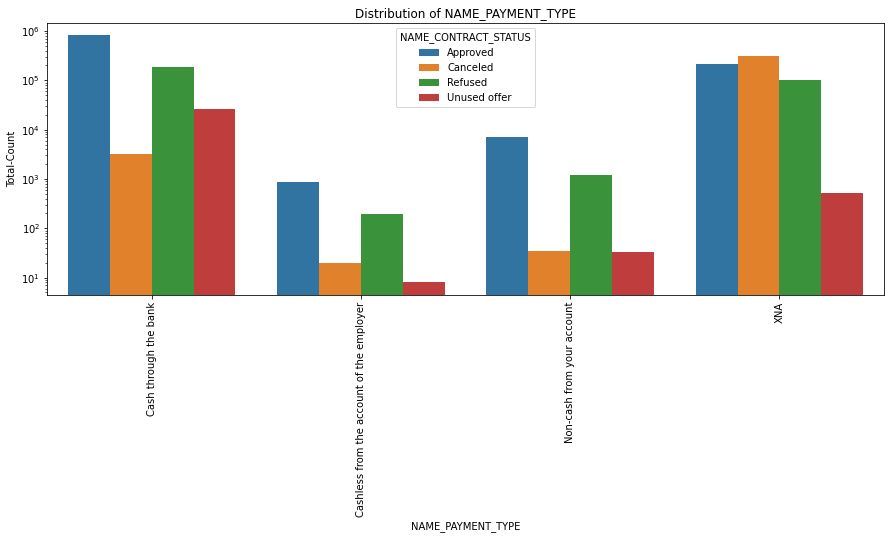

In [586]:
Uni_Prev('NAME_PAYMENT_TYPE')

From the above chart, we can infer that most of the clients chose to repay the loan using the 'Cash through the bank' option
We can also see that 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

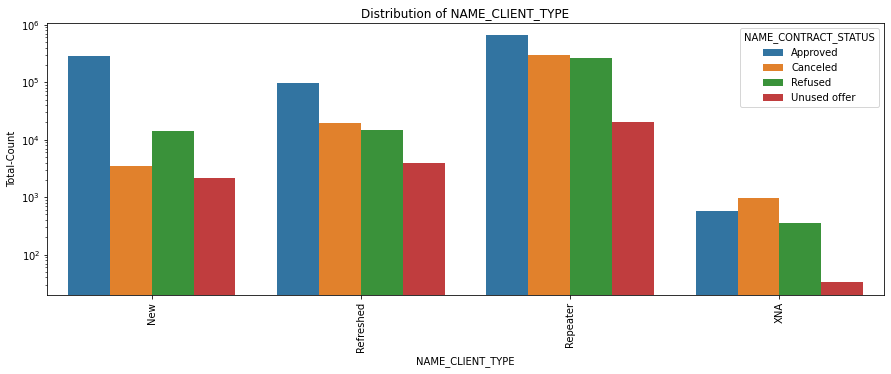

In [587]:
Uni_Prev('NAME_CLIENT_TYPE')

Most of the loan applications are from repeat customers. They also get refused most often.

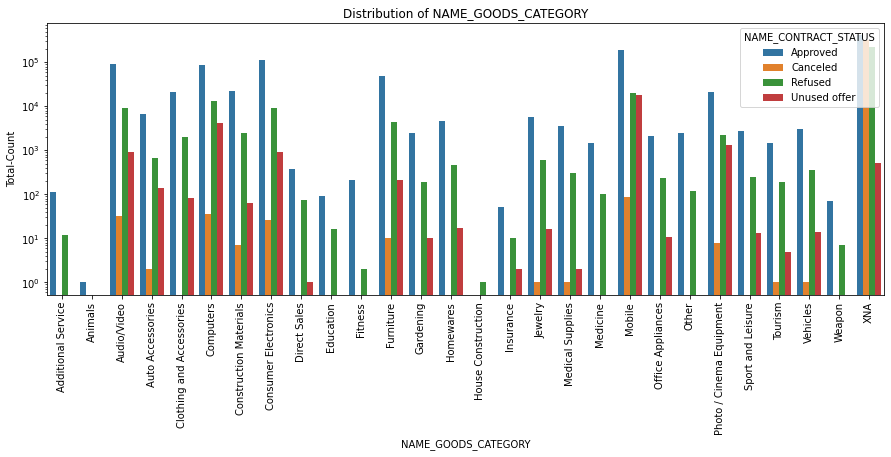

In [588]:
Uni_Prev('NAME_GOODS_CATEGORY')

In [589]:
#Getting the top 10 correlation PreviousApplication
corr=prev_app_df.corr()
corrprev_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corrprev_df.columns=['Var-X','Var-Y','Correlation']
corrprev_df.dropna(subset=['Correlation'],inplace=True)
corrprev_df['Abs_Correlation']=corrprev_df['Correlation'].abs()
corrprev_df = corrprev_df.sort_values(by=['Abs_Correlation'], ascending=False)
corrprev_df.head(10)

,Var-X,Var-Y,Correlation,Abs_Correlation
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.997948,0.997948
59,AMT_GOODS_PRICE,AMT_CREDIT,0.976989,0.976989
47,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.812255,0.812255
46,AMT_CREDIT,AMT_ANNUITY,0.811670,0.811670
35,AMT_APPLICATION,AMT_ANNUITY,0.805558,0.805558
113,CNT_PAYMENT,AMT_APPLICATION,0.715265,0.715265
114,CNT_PAYMENT,AMT_CREDIT,0.712785,0.712785
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.698067,0.698067
112,CNT_PAYMENT,AMT_ANNUITY,0.414696,0.414696


<Figure size 1440x576 with 0 Axes>

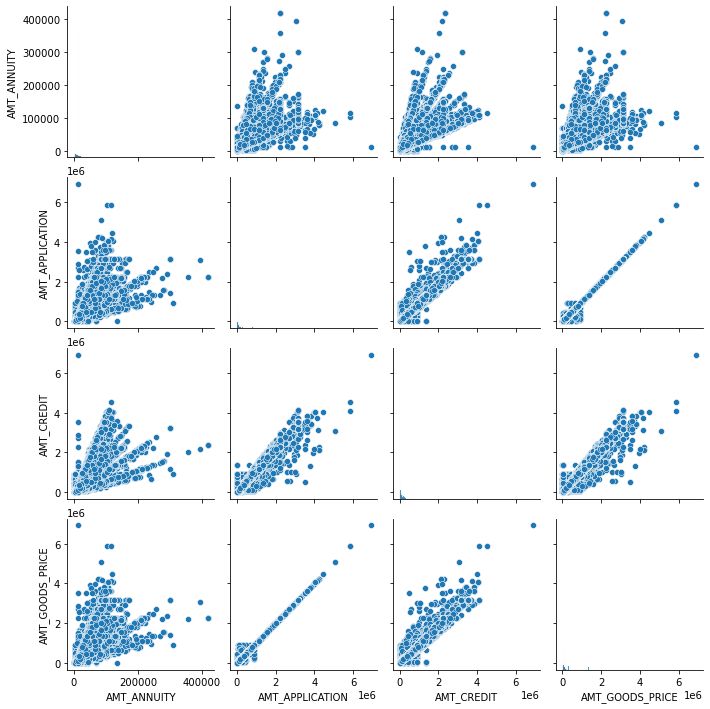

In [590]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(prev_app_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']])
plt.show()

In [591]:
AMT_cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']

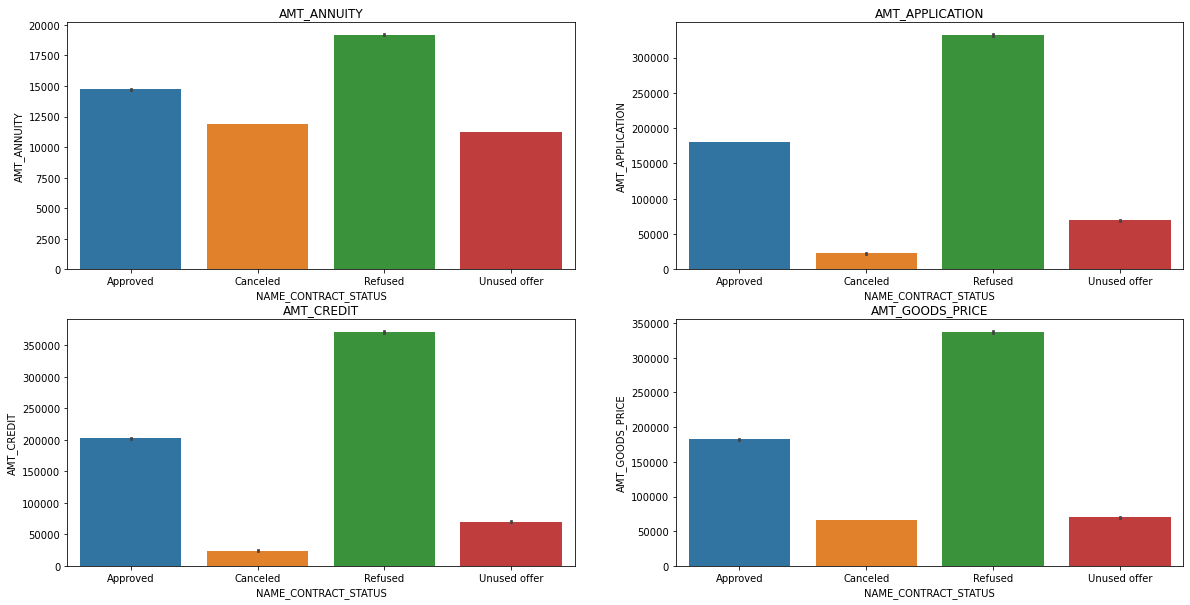

In [592]:
plt.figure(figsize=(20,10))
for i in range(len(AMT_cols)):
    plt.subplot(2,2,i+1)
    plt.title(AMT_cols[i])
    sns.barplot(y=AMT_cols[i],x='NAME_CONTRACT_STATUS',data=prev_app_df)
    i=i+1
plt.show()

In [593]:
prev_app_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

#  Merged Dataframes Analysis

In [594]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
merge_df = pd.merge(curr_app_df, prev_app_df, how='inner', on='SK_ID_CURR')
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE-GROUP-DETAILED,YEARS-EMPLOYED,AMT_INCOME_TOTAL_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,Male,N,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,1,1,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25-30,0-5,2L-4L,4L-6L,2L-4L,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,Female,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45-50,0-5,2L-4L,10L-Above,10L-Above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,Female,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45-50,0-5,2L-4L,10L-Above,10L-Above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,Female,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,1,1,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45-50,0-5,2L-4L,10L-Above,10L-Above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,Male,Y,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,1,1,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,50-55,0-5,0-2L,0-2L,0-2L,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Ap

In [595]:
merge_df.shape

(1413701, 79)

In [596]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 79 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413701 non-null  int64   
 1   TARGET                        1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  category
 3   CODE_GENDER                   1413701 non-null  category
 4   FLAG_OWN_CAR                  1413701 non-null  category
 5   FLAG_OWN_REALTY               1413701 non-null  category
 6   CNT_CHILDREN                  1413701 non-null  category
 7   AMT_INCOME_TOTAL              1413701 non-null  float64 
 8   AMT_CREDIT_x                  1413701 non-null  float64 
 9   AMT_ANNUITY_x                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413701 non-null  float64 
 11  NAME_TYPE_SUITE               1410175 non-null  category
 12  NAME_INCOME_TY

In [597]:
# Bisecting the "merge_df" dataframe based on Target value 0 and 1 for correlation and other analysis

merge_0 = merge_df[merge_df['TARGET']==0] # All-Other-Cases
merge_1 = merge_df[merge_df['TARGET']==1] # Defaulters

Plotting Contract Status vs purpose of the loan

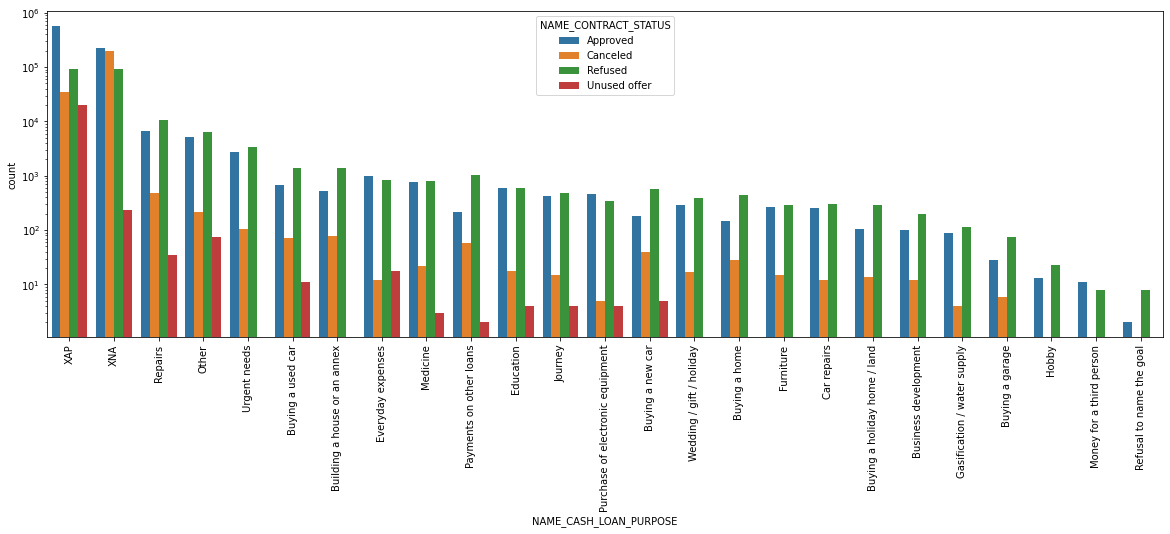

In [598]:
plt.figure(figsize=(20,6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS' ,data=merge_0,order=merge_0['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')  
plt.xticks(rotation=90)
plt.show()


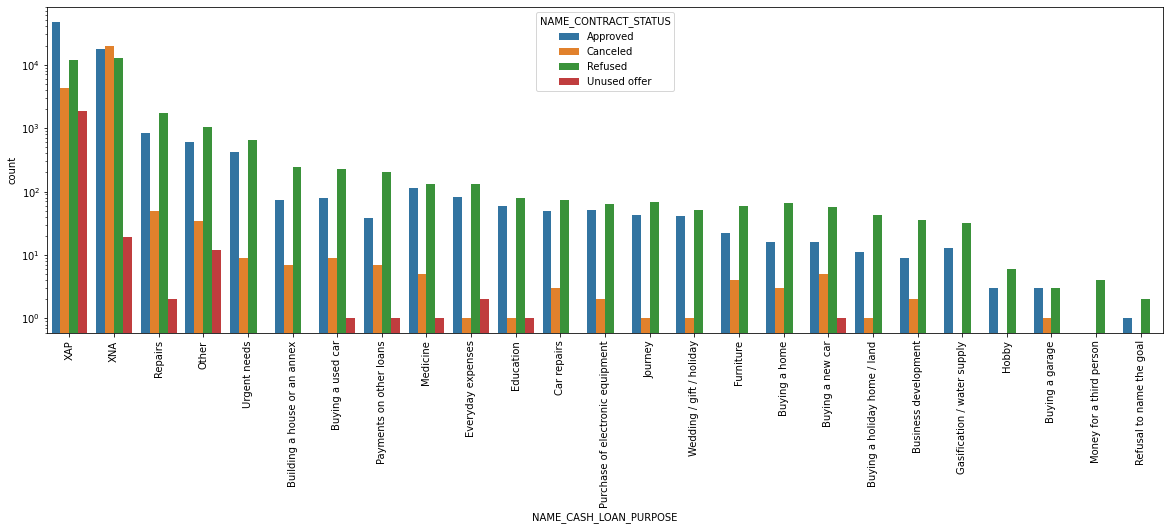

In [599]:
plt.figure(figsize=(20,6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS' ,data=merge_1,order=merge_1['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')  
plt.xticks(rotation=90)
plt.show()


Loan taken for the purpose of Repairs looks to have highest default rate

Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.



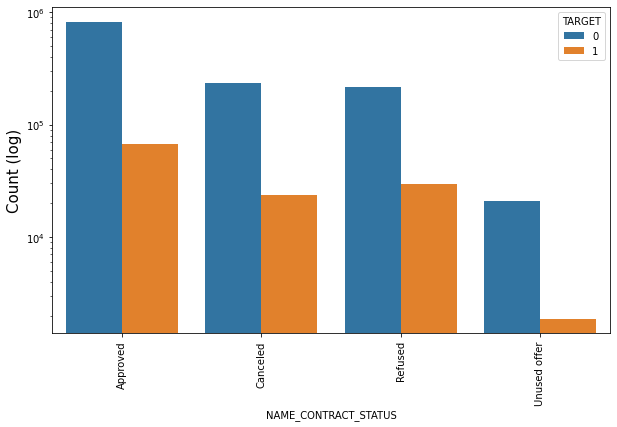

In [600]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss.
plt.figure(figsize=(10,6))
sns.countplot(x='NAME_CONTRACT_STATUS',hue='TARGET' ,data=merge_df)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [601]:
Percent_cont_tar = merge_df.groupby(by=['NAME_CONTRACT_STATUS'])['TARGET']
Percent_cont_tar = pd.concat([Percent_cont_tar.value_counts(),round(Percent_cont_tar.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
Percent_cont_tar

Counts  Percentage
NAME_CONTRACT_STATUS TARGET                    
Approved             0       818856       92.41
                     1        67243        7.59
Canceled             0       235641       90.83
                     1        23800        9.17
Refused              0       215952       88.00
                     1        29438       12.00
Unused offer         0        20892       91.75
                     1         1879        8.25

Comments:

90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients
88% of the clients who have been previously refused a loan has payed back the loan in current case.
Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.

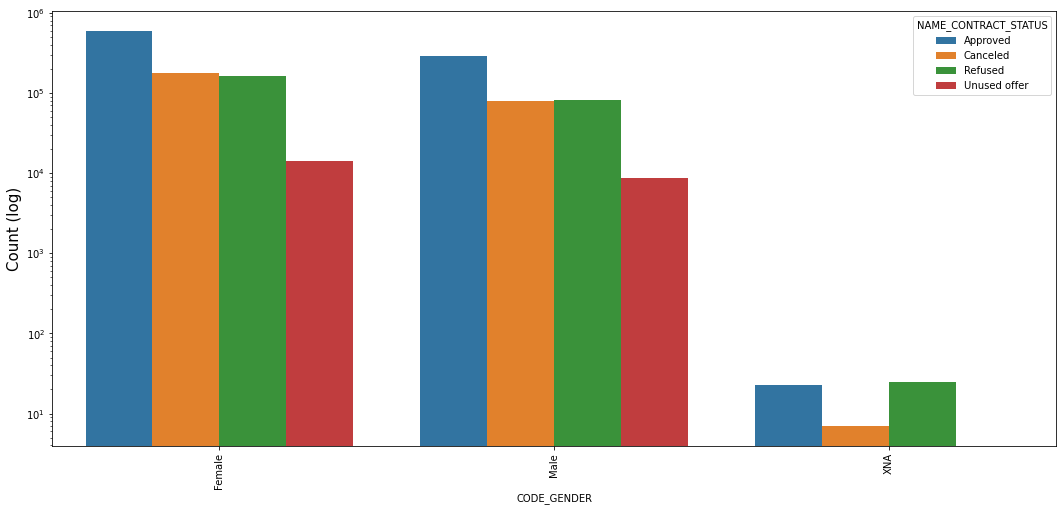

In [602]:
# Plotting Gender vs Name Contract Status
plt.figure(figsize=(18,8))
sns.countplot(x='CODE_GENDER',hue='NAME_CONTRACT_STATUS' ,data=merge_df)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Females clients get approved a loan easily tha males clients.

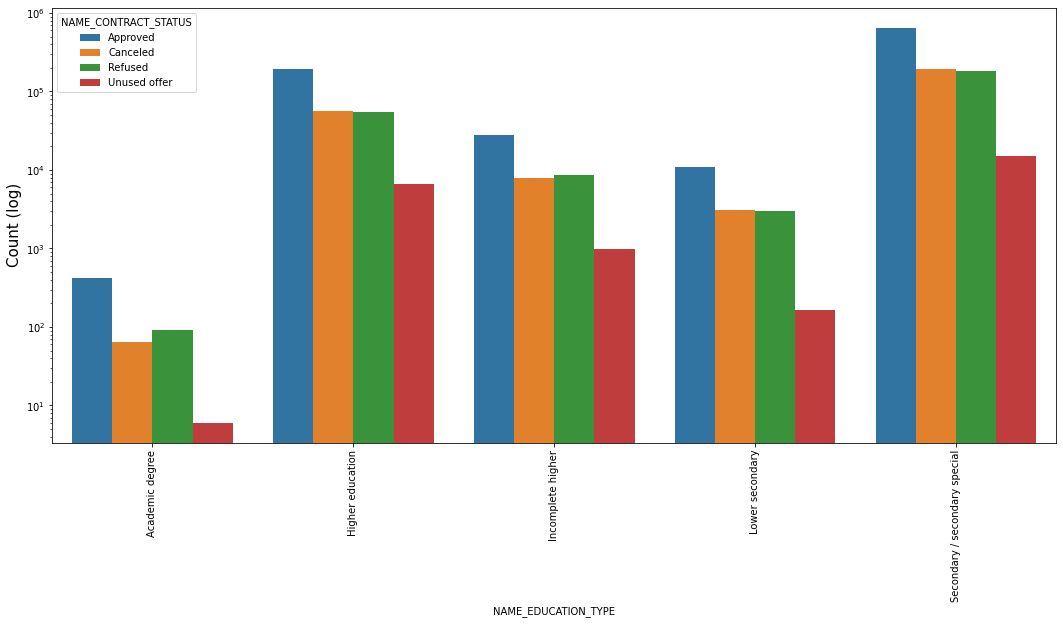

In [603]:
# Plotting Education vs Name Contract Status
plt.figure(figsize=(18,8))
sns.countplot(x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS' ,data=merge_df)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

We can see that people with Academic degree gets approved their easily 



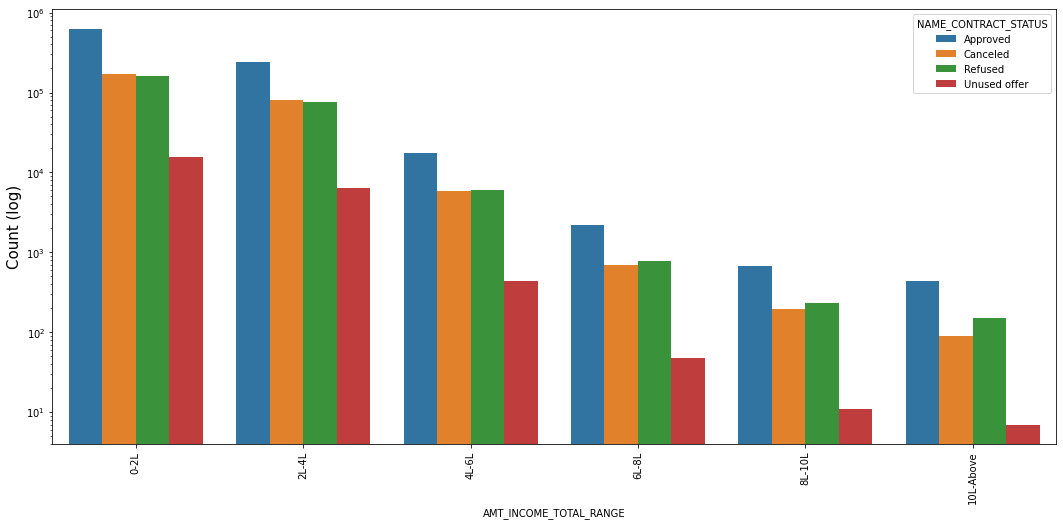

In [604]:
# Plotting Income vs Name Contract Status
plt.figure(figsize=(18,8))
sns.countplot(x='AMT_INCOME_TOTAL_RANGE',hue='NAME_CONTRACT_STATUS' ,data=merge_df)
plt.yscale('log')
plt.ylabel("Count (log)",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Clients with high income have low refusal rates.

# Conclusions

Decisive Factor whether an applicant will be Defaulter:
    
CODE_GENDER: Men are at relatively higher default rate
    
NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
    
NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
    
NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
    
REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.
    
ORGANIZATION_TYPE: Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.Organizations with highest percent of loans not repaid are Transport: type 3 , Industry: type 13 , Industry: type 8 and Restaurant . 

OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.

DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting

DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.

CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children or family memequal to or more than 9 chance of default highly likey to be 100% and hence their applications are to be rejected.

AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.

------------------------------------  

Decisive Factor whether an applicant will be Repayer:
    
NAME_EDUCATION_TYPE: Academic degree has less defaults.
    
NAME_INCOME_TYPE: Student and Businessmen have no defaults.
    
REGION_RATING_CLIENT: RATING 1 is safer.
    
DAYS_BIRTH: People above age of 50 have low probability of defaulting
    
DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
    
AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
    
NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
    
CNT_CHILDREN: People with zero to two children tend to repay the loans.


